In [2]:
import requests

In [3]:
api_key = "7ASYvPl3jullnLvM2KdulXEovDf4VdhLbzx6WXRrvjhTEe6sjHCCaCwJUvPNIG3q"
secret_key = "eLwZpr6lhRlj8gBKyhJ7pf00Nc7GgJDsteqXPwl5060Qfglr9cN2kXGbrWJtGHZH"

In [4]:
import pandas as pd
import json

# Base URL for Binance API
BASE_URL = "https://api.binance.com"

In [5]:
print("Fetching exchange information..."    )

Fetching exchange information...


In [6]:
! pip install matplotlib

In [7]:
! pip install python-binance

In [8]:
from binance.client import Client

# Initialize the Client using the keys defined earlier
client = Client(api_key, secret_key)

# Fetch historical klines
# The wrapper handles pagination automatically for long time ranges
klines = client.get_historical_klines("BTCUSDT", Client.KLINE_INTERVAL_4HOUR, "1 Dec, 2020")

# Process data into DataFrame
df_wrapper = pd.DataFrame(klines, columns=[
    "Open time", "Open", "High", "Low", "Close", "Volume",
    "Close time", "Quote asset volume", "Number of trades",
    "Taker buy base asset volume", "Taker buy quote asset volume", "Ignore"
])

# Convert types
df_wrapper["Open time"] = pd.to_datetime(df_wrapper["Open time"], unit="ms")
numeric_cols = ["Open", "High", "Low", "Close", "Volume"]
df_wrapper[numeric_cols] = df_wrapper[numeric_cols].apply(pd.to_numeric, axis=1)

print(f"Fetched {len(df_wrapper)} rows using python-binance")
df_wrapper.head()

Fetched 11078 rows using python-binance


,Open time,Open,High,Low,Close,Volume,Close time,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,Ignore
0,2020-12-01 00:00:00,19695.87,19720.00,19340.00,19419.74,12570.899335,1606795199999,246205790.80393360,230879,6388.30774300,125140811.34723343,0
1,2020-12-01 04:00:00,19419.73,19546.81,19281.38,19515.63,12160.743244,1606809599999,236193540.76419855,211293,6227.99840900,120963614.14023737,0
2,2020-12-01 08:00:00,19515.62,19888.00,18886.00,19425.00,28164.359574,1606823999999,550649685.20217835,403700,15114.14767300,295922847.74266257,0
3,2020-12-01 12:00:00,19425.40,19489.30,18001.12,19263.37,46986.234611,1606838399999,885821088.62842229,629174,22839.08178300,430329567.72097084,0
4,2020-12-01 16:00:00,19263.36,19325.83,18611.88,19069.79,18487.203308,1606852799999,350313918.21324739,326259,8521.70112900,161512996.08982220,0


In [9]:
df = df_wrapper

In [10]:
import numpy as np

In [11]:
df['log_average'] = np.log(df['Close'] / df['Close'].shift(1))

In [12]:
df

,Open time,Open,High,Low,Close,Volume,Close time,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,Ignore,log_average
0,2020-12-01 00:00:00,19695.87,19720.00,19340.00,19419.74,12570.899335,1606795199999,246205790.80393360,230879,6388.30774300,125140811.34723343,0,NaN
1,2020-12-01 04:00:00,19419.73,19546.81,19281.38,19515.63,12160.743244,1606809599999,236193540.76419855,211293,6227.99840900,120963614.14023737,0,0.004926
2,2020-12-01 08:00:00,19515.62,19888.00,18886.00,19425.00,28164.359574,1606823999999,550649685.20217835,403700,15114.14767300,295922847.74266257,0,-0.004655
3,2020-12-01 12:00:00,19425.40,19489.30,18001.12,19263.37,46986.234611,1606838399999,885821088.62842229,629174,22839.08178300,430329567.72097084,0,-0.008356
4,2020-12-01 16:00:00,19263.36,19325.83,18611.88,19069.79,18487.203308,1606852799999,350313918.21324739,326259,8521.70112900,161512996.08982220,0,-0.010100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11073,2025-12-20 12:00:00,88277.66,88343.73,87795.76,88178.71,1315.675370,1766246399999,115955453.27595540,271332,559.81615000,49341498.95854720,0,-0.001122
11074,2025-12-20 16:00:00,88178.72,88418.73,88103.54,88232.92,574.104910,1766260799999,50646063.75424630,146754,275.81192000,24333152.68544030,0,0.000615
11075,2025-12-20 20:00:00,88232.92,88443.44,88154.06,88360.90,629.309560,1766275199999,55551786.91834000,146283,336.14911000,29672787.24625560,0,0.001449
11076,2025-12-21 00:00:00,88360.91,88433.64,87869.35,88070.64,991.416870,1766289599999,87337728.98064220,204114,533.39987000,46984600.58384830,0,-0.003290


In [13]:
# Calculate volatility metrics
df['vol_10'] = df['log_average'].rolling(window=10).std()
df['vol_20'] = df['log_average'].rolling(window=20).std()
df['vol_40'] = df['log_average'].rolling(window=40).std()
df['vol_ratio'] = df['vol_10'] / df['vol_40']

# Display the new columns
df[['Open time', 'Close', 'log_average', 'vol_10', 'vol_20', 'vol_40', 'vol_ratio']].head(50)

,Open time,Close,log_average,vol_10,vol_20,vol_40,vol_ratio
0,2020-12-01 00:00:00,19419.74,NaN,NaN,NaN,NaN,NaN
1,2020-12-01 04:00:00,19515.63,0.004926,NaN,NaN,NaN,NaN
2,2020-12-01 08:00:00,19425.00,-0.004655,NaN,NaN,NaN,NaN
3,2020-12-01 12:00:00,19263.37,-0.008356,NaN,NaN,NaN,NaN
4,2020-12-01 16:00:00,19069.79,-0.010100,NaN,NaN,NaN,NaN
5,2020-12-01 20:00:00,18764.96,-0.016114,NaN,NaN,NaN,NaN
6,2020-12-02 00:00:00,18618.25,-0.007849,NaN,NaN,NaN,NaN
7,2020-12-02 04:00:00,19124.48,0.026827,NaN,NaN,NaN,NaN
8,2020-12-02 08:00:00,19127.31,0.000148,NaN,NaN,NaN,NaN
9,2020-12-02 12:00:00,18891.57,-0.012401,NaN,NaN,NaN,NaN


In [14]:
import matplotlib.pyplot as plt

# Calculate True Range and Range metrics
df['true_range'] = df['High'] - df['Low']
df['norm_range'] = df['true_range'] / df['Close']
df['atr_14'] = df['true_range'].rolling(window=14).mean()
df['range_ratio'] = df['true_range'] / df['true_range'].rolling(window=20).mean()

# Calculate Volume metrics
df['vol_rel'] = df['Volume'] / df['Volume'].rolling(window=20).mean()
df['vol_z'] = (df['Volume'] - df['Volume'].rolling(window=20).mean()) / df['Volume'].rolling(window=20).std()
df['abs_r_x_vol'] = df['log_average'].abs() * df['vol_rel']

# Calculate Regime Labels
# Trend regime: based on 6-period return sign consistency
df['sum_r_6'] = df['log_average'].rolling(window=6).sum()
df['trend_regime'] = df['sum_r_6'].apply(lambda x: 'trend' if abs(x) > 0.01 else 'range')

# Volume regime: based on vol_20 quantiles
vol_20_q33 = df['vol_20'].quantile(0.33)
vol_20_q67 = df['vol_20'].quantile(0.67)
df['vol_regime'] = df['vol_20'].apply(
    lambda x: 'low' if x <= vol_20_q33 else ('high' if x >= vol_20_q67 else 'medium')
)

# Display the new features
print(df[['Open time', 'Close', 'true_range', 'norm_range', 'atr_14', 'range_ratio', 
          'vol_rel', 'vol_z', 'abs_r_x_vol', 'trend_regime', 'vol_regime']].tail(20))

                Open time     Close  true_range  norm_range       atr_14  \
11058 2025-12-18 00:00:00  86618.34      999.82    0.011543  1368.867857   
11059 2025-12-18 04:00:00  86833.84      516.79    0.005951  1338.446429   
11060 2025-12-18 08:00:00  87300.74      768.49    0.008803  1311.251429   
11061 2025-12-18 12:00:00  88513.44     2367.85    0.026751  1383.999286   
11062 2025-12-18 16:00:00  84483.79     4052.30    0.047965  1573.518571   
11063 2025-12-18 20:00:00  85516.41     1385.89    0.016206  1524.757143   
11064 2025-12-19 00:00:00  86891.39     2458.75    0.028297  1629.743571   
11065 2025-12-19 04:00:00  87953.40     1801.55    0.020483  1716.445000   
11066 2025-12-19 08:00:00  88198.70      642.46    0.007284  1705.192857   
11067 2025-12-19 12:00:00  87951.87     1885.38    0.021436  1754.903571   
11068 2025-12-19 16:00:00  87845.92     2036.39    0.023181  1836.180714   
11069 2025-12-19 20:00:00  88136.94      812.06    0.009214  1640.715000   
11070 2025-1

In [15]:
df['log_average']

0             NaN
1        0.004926
2       -0.004655
3       -0.008356
4       -0.010100
           ...   
11073   -0.001122
11074    0.000615
11075    0.001449
11076   -0.003290
11077    0.000632
Name: log_average, Length: 11078, dtype: float64

Bin Distribution:
target_bin
Large Down     0.069730
Medium Down    0.170299
Flat           0.501040
Medium Up      0.190468
Large Up       0.068463
Name: proportion, dtype: float64


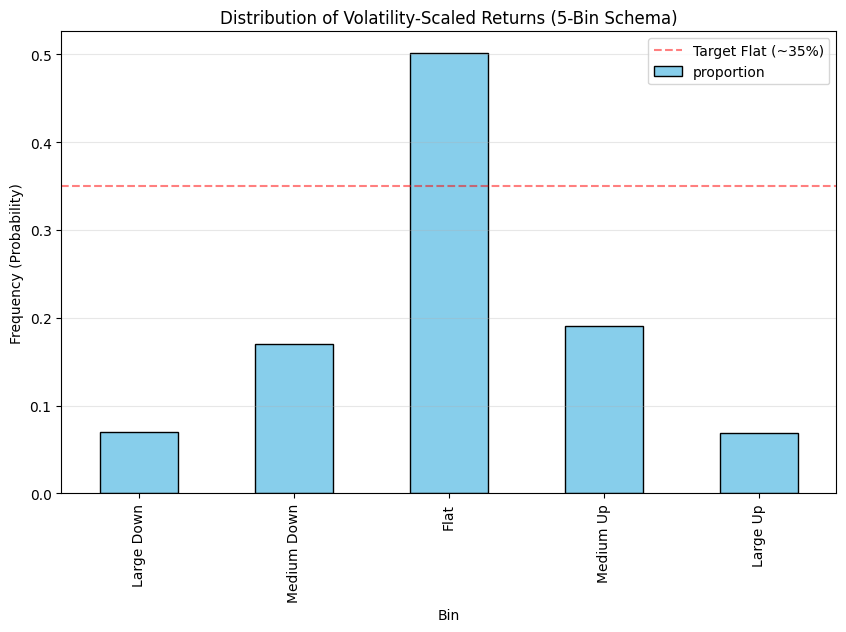

,Open time,Close,vol_20,target_return,z_score,target_bin
11068,2025-12-19 16:00:00,87845.92,0.013273,0.003307,0.249177,Flat
11069,2025-12-19 20:00:00,88136.94,0.013166,0.000885,0.067222,Flat
11070,2025-12-20 00:00:00,88214.98,0.013123,0.000685,0.052183,Flat
11071,2025-12-20 04:00:00,88275.41,0.013107,0.000025,0.001945,Flat
11072,2025-12-20 08:00:00,88277.66,0.012983,-0.001122,-0.086384,Flat
11073,2025-12-20 12:00:00,88178.71,0.012976,0.000615,0.047363,Flat
11074,2025-12-20 16:00:00,88232.92,0.012972,0.001449,0.111735,Flat
11075,2025-12-20 20:00:00,88360.90,0.012963,-0.003290,-0.253816,Flat
11076,2025-12-21 00:00:00,88070.64,0.012540,0.000632,0.050375,Flat
11077,2025-12-21 04:00:00,88126.29,0.012535,NaN,NaN,NaN


In [16]:
# --- 5-Bin Volatility-Scaled Labeling ---

# 1. Compute the label value (Next-bar log return)
# y_t = log(close_{t+1} / close_t)
df['target_return'] = np.log(df['Close'].shift(-1) / df['Close'])

# 2. Scale by recent volatility
# z_t = y_t / vol_20_t
# Note: vol_20 is the volatility of the *past* 20 periods, known at time t.
df['z_score'] = df['target_return'] / df['vol_20']

# 3. Binning (5-bin volatility-scaled scheme)
# Define bin edges and labels
bin_edges = [-np.inf, -1.5, -0.5, 0.5, 1.5, np.inf]
bin_labels = [
    'Large Down',   # z <= -1.5
    'Medium Down',  # -1.5 < z <= -0.5
    'Flat',         # -0.5 < z < 0.5
    'Medium Up',    # 0.5 <= z < 1.5
    'Large Up'      # z >= 1.5
]

df['target_bin'] = pd.cut(df['z_score'], bins=bin_edges, labels=bin_labels)

# 4. Sanity Check: Plot histogram of bins
# We drop NaN values (first 20 rows from vol, last 1 row from shift) for the plot
valid_bins = df['target_bin'].dropna()
bin_counts = valid_bins.value_counts(normalize=True).sort_index()

print("Bin Distribution:")
print(bin_counts)

plt.figure(figsize=(10, 6))
bin_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Volatility-Scaled Returns (5-Bin Schema)')
plt.xlabel('Bin')
plt.ylabel('Frequency (Probability)')
plt.axhline(y=0.35, color='r', linestyle='--', alpha=0.5, label='Target Flat (~35%)')
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.show()

# Display a sample of the calculation
df[['Open time', 'Close', 'vol_20', 'target_return', 'z_score', 'target_bin']].tail(10)

In [17]:
# List of original columns from Binance API
original_cols = [
    "Open", "High", "Low", "Close", "Volume",
     "Quote asset volume", "Number of trades",
    "Taker buy base asset volume", "Taker buy quote asset volume", "Ignore"
]

# Drop them, keeping only the derived features
# We use errors='ignore' in case some columns were already dropped or renamed
df = df.drop(columns=original_cols, errors='ignore')

# Display the remaining columns (your derived features)
print("Remaining columns:", df.columns.tolist())
df[40:100]

Remaining columns: ['Open time', 'Close time', 'log_average', 'vol_10', 'vol_20', 'vol_40', 'vol_ratio', 'true_range', 'norm_range', 'atr_14', 'range_ratio', 'vol_rel', 'vol_z', 'abs_r_x_vol', 'sum_r_6', 'trend_regime', 'vol_regime', 'target_return', 'z_score', 'target_bin']


,Open time,Close time,log_average,vol_10,vol_20,vol_40,vol_ratio,true_range,norm_range,atr_14,range_ratio,vol_rel,vol_z,abs_r_x_vol,sum_r_6,trend_regime,vol_regime,target_return,z_score,target_bin
40,2020-12-07 16:00:00,1607371199999,-0.012933,0.008311,0.008212,0.009967,0.833792,338.51,0.017847,235.110000,1.270476,1.261241,0.731079,0.016311,-0.008694,range,medium,0.010484,1.276626,Medium Up
41,2020-12-07 20:00:00,1607385599999,0.010484,0.009050,0.008438,0.010084,0.897441,282.58,0.014743,240.418571,1.097055,0.775185,-0.746529,0.008127,-0.009993,range,medium,-0.000635,-0.075271,Flat
42,2020-12-08 00:00:00,1607399999999,-0.000635,0.008709,0.008376,0.010061,0.865629,102.93,0.005374,237.315714,0.412309,0.747338,-0.817043,0.000475,-0.006658,range,medium,-0.000607,-0.072508,Flat
43,2020-12-08 04:00:00,1607414399999,-0.000607,0.008695,0.006794,0.009977,0.871482,203.84,0.010648,238.992857,0.864339,0.991129,-0.031933,0.000602,-0.011850,trend,low,-0.020058,-2.952441,Large Down
44,2020-12-08 08:00:00,1607428799999,-0.020058,0.010774,0.008053,0.010349,1.041016,468.88,0.024990,257.414286,1.951410,2.131474,3.291895,0.042752,-0.017991,trend,medium,0.002499,0.310356,Flat
45,2020-12-08 12:00:00,1607443199999,0.002499,0.009816,0.007991,0.010039,0.977838,364.83,0.019396,272.402143,1.465092,1.717687,1.940520,0.004293,-0.021250,trend,medium,-0.000754,-0.094309,Flat
46,2020-12-08 16:00:00,1607457599999,-0.000754,0.009829,0.007879,0.009958,0.987092,192.50,0.010242,264.714286,0.784577,0.985755,-0.038388,0.000743,-0.009071,range,medium,-0.025413,-3.225188,Large Down
47,2020-12-08 20:00:00,1607471999999,-0.025413,0.011789,0.009508,0.009805,1.202300,648.00,0.035363,289.901429,2.423862,2.166722,2.629942,0.055062,-0.044967,trend,medium,-0.001316,-0.138418,Flat
48,2020-12-09 00:00:00,1607486399999,-0.001316,0.011465,0.009491,0.009803,1.169508,348.00,0.019016,300.823571,1.254400,1.658235,1.482343,0.002182,-0.045648,trend,medium,-0.020757,-2.186956,Large Down
49,2020-12-09 04:00:00,1607500799999,-0.020757,0.011938,0.010306,0.010134,1.178002,478.39,0.026690,308.208571,1.636500,1.506451,1.183008,0.031270,-0.065798,trend,medium,0.017744,1.721678,Large Up


In [18]:
! pip install xgboost

  Using cached xgboost-3.1.2-py3-none-win_amd64.whl.metadata (2.1 kB)
  Using cached scipy-1.15.3-cp310-cp310-win_amd64.whl.metadata (60 kB)
Using cached xgboost-3.1.2-py3-none-win_amd64.whl (72.0 MB)
Using cached scipy-1.15.3-cp310-cp310-win_amd64.whl (41.3 MB)

   ---------------------------------------- 0/2 [scipy]
   ---------------------------------------- 0/2 [scipy]
   ---------------------------------------- 0/2 [scipy]
   ---------------------------------------- 0/2 [scipy]
   ---------------------------------------- 0/2 [scipy]
   ---------------------------------------- 0/2 [scipy]
   ---------------------------------------- 0/2 [scipy]
   ---------------------------------------- 0/2 [scipy]
   ---------------------------------------- 0/2 [scipy]
   ---------------------------------------- 0/2 [scipy]
   ---------------------------------------- 0/2 [scipy]
   ---------------------------------------- 0/2 [scipy]
   ---------------------------------------- 0/2 [scipy]
   -----

In [19]:
! pip install scikit-learn

  Using cached scikit_learn-1.7.2-cp310-cp310-win_amd64.whl.metadata (11 kB)
  Using cached joblib-1.5.3-py3-none-any.whl.metadata (5.5 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.7.2-cp310-cp310-win_amd64.whl (8.9 MB)
Using cached joblib-1.5.3-py3-none-any.whl (309 kB)
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)

   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   -------------------------- -------------

In [20]:
! pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


Training samples: 6570
Testing samples: 4467

Log Loss: 1.3480

Conditional Tail Lift (Large Up):
When model predicts high probability, does it happen more often?
Prob_Bin_Up
0    0.024609
1    0.044743
2    0.042601
3    0.067114
4    0.051454
5    0.056054
6    0.091723
7    0.087444
8    0.125280
9    0.102908
Name: True Label, dtype: float64


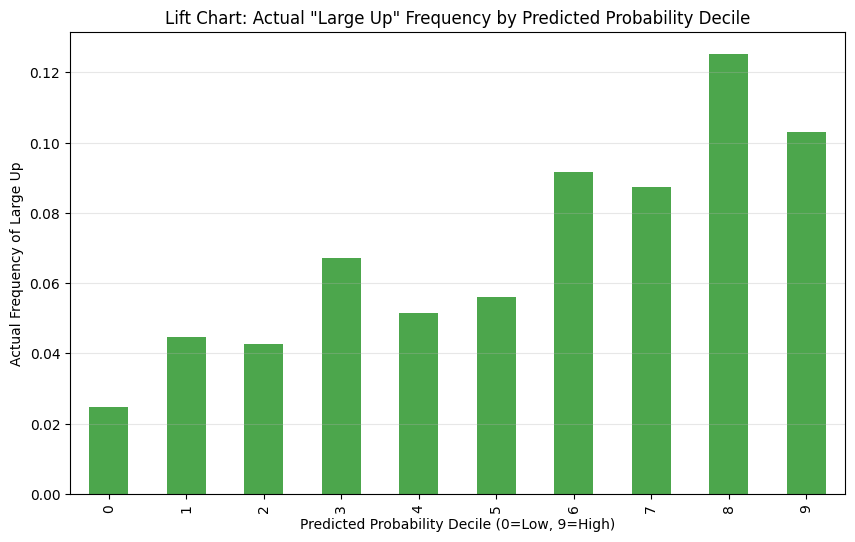

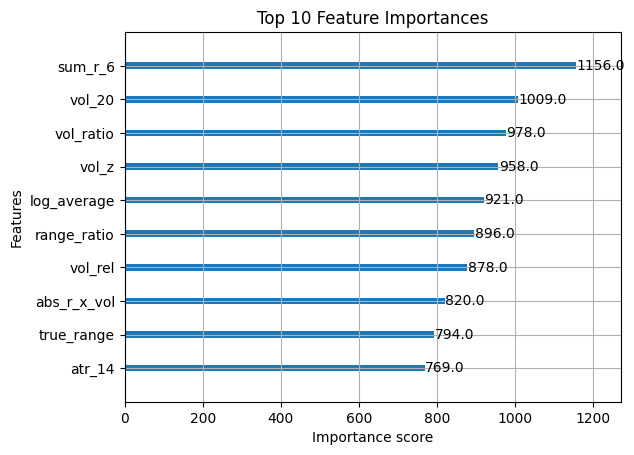

In [18]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, log_loss
import seaborn as sns

# 1. Prepare Data
# Drop rows with NaN values (created by rolling windows and shifting)
df_model = df.dropna().copy()

# Define Features (X) and Target (y)
# We exclude 'Open time', 'Close time', 'target_return', 'z_score', 'target_bin' from features
# We also exclude 'Close' as raw price is not a good feature for ML (non-stationary)
feature_cols = [
    'log_average', 'vol_10', 'vol_20', 'vol_40', 'vol_ratio',
    'true_range', 'norm_range', 'atr_14', 'range_ratio',
    'vol_rel', 'vol_z', 'abs_r_x_vol', 'sum_r_6'
]

# Encode categorical features if any (trend_regime, vol_regime)
# XGBoost can handle categories, but simple one-hot or label encoding is safer
df_model['trend_regime_code'] = df_model['trend_regime'].astype('category').cat.codes
df_model['vol_regime_code'] = df_model['vol_regime'].astype('category').cat.codes
feature_cols.extend(['trend_regime_code', 'vol_regime_code'])

X = df_model[feature_cols]
y = df_model['target_bin']

# Map string labels to integers for XGBoost
label_mapping = {label: i for i, label in enumerate(y.cat.categories)}
y_encoded = y.map(label_mapping)

# 2. Split Data (Time-based split)
# Train on first 3 years, Test on last 2 years
# Data is 4-hour interval.
# 1 year = 365 days * (24 hours / 4 hours) = 365 * 6 = 2190 periods
periods_per_year = 365 * 6
split_point = periods_per_year * 3  # 3 years of 4-hour candles

if len(df_model) < split_point + periods_per_year:
    print(f"Warning: Not enough data for requested split (Need > {split_point + periods_per_year}, have {len(df_model)}). Using 60/40 split instead.")
    split_point = int(len(df_model) * 0.6)

X_train = X.iloc[:split_point]
y_train = y_encoded.iloc[:split_point]
X_test = X.iloc[split_point:]
y_test = y_encoded.iloc[split_point:]

print(f"Training samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")

# 3. Train XGBoost Model (Probabilistic)
# We use 'multi:softprob' to get probability vectors instead of hard classes
model = xgb.XGBClassifier(
    objective='multi:softprob',
    num_class=5,  # 5 bins
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42,
    # Optional: Add class weights if you want to emphasize tails
    # sample_weight=... (requires creating a weight array matching y_train)
)

model.fit(X_train, y_train)

# 4. Evaluate Probabilities
# Get probability vectors (rows sum to 1)
y_pred_proba = model.predict_proba(X_test)

# Calculate Log Loss (lower is better) - measures confidence of correct predictions
loss = log_loss(y_test, y_pred_proba)
print(f"\nLog Loss: {loss:.4f}")

# 5. Analyze Conditional Tail Lift
# Let's see if high probability predictions actually correlate with outcomes
# We'll look at the "Large Up" bin (Index 4 in our mapping, usually)
large_up_idx = label_mapping['Large Up']
large_down_idx = label_mapping['Large Down']

# Create a DataFrame for analysis
results = pd.DataFrame({
    'True Label': y_test,
    'Prob_Large_Up': y_pred_proba[:, large_up_idx],
    'Prob_Large_Down': y_pred_proba[:, large_down_idx]
})

# Bin the probabilities into deciles
results['Prob_Bin_Up'] = pd.qcut(results['Prob_Large_Up'], q=10, labels=False, duplicates='drop')

# Calculate the actual frequency of "Large Up" in each probability bin
lift_analysis = results.groupby('Prob_Bin_Up')['True Label'].apply(lambda x: (x == large_up_idx).mean())

print("\nConditional Tail Lift (Large Up):")
print("When model predicts high probability, does it happen more often?")
print(lift_analysis)

plt.figure(figsize=(10, 6))
lift_analysis.plot(kind='bar', color='green', alpha=0.7)
plt.title('Lift Chart: Actual "Large Up" Frequency by Predicted Probability Decile')
plt.xlabel('Predicted Probability Decile (0=Low, 9=High)')
plt.ylabel('Actual Frequency of Large Up')
plt.grid(axis='y', alpha=0.3)
plt.show()

# Feature Importance
xgb.plot_importance(model, max_num_features=10)
plt.title("Top 10 Feature Importances")
plt.show()

In [22]:
# Install PyTorch with CUDA support
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://download.pytorch.org/whl/cu118
  Using cached https://download.pytorch.org/whl/cu118/torch-2.7.1%2Bcu118-cp310-cp310-win_amd64.whl.metadata (27 kB)
  Using cached https://download.pytorch.org/whl/cu118/torchvision-0.22.1%2Bcu118-cp310-cp310-win_amd64.whl.metadata (6.3 kB)
  Using cached https://download.pytorch.org/whl/cu118/torchaudio-2.7.1%2Bcu118-cp310-cp310-win_amd64.whl.metadata (6.8 kB)
  Using cached filelock-3.20.0-py3-none-any.whl.metadata (2.1 kB)
  Using cached sympy-1.14.0-py3-none-any.whl.metadata (12 kB)
  Using cached networkx-3.4.2-py3-none-any.whl.metadata (6.3 kB)
  Using cached https://download.pytorch.org/whl/jinja2-3.1.6-py3-none-any.whl.metadata (2.9 kB)
  Using cached fsspec-2025.12.0-py3-none-any.whl.metadata (10 kB)
  Using cached mpmath-1.3.0-py3-none-any.whl.metadata (8.6 kB)
  Using cached https://download.pytorch.org/whl/MarkupSafe-2.1.5-cp310-cp310-win_amd64.whl (17 kB)
Using cached https://download.pytorch.org/whl/cu118/torch-2

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# --- Random Forest Model ---

print("Training Random Forest...")
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate
rf_pred_proba = rf_model.predict_proba(X_test)
rf_loss = log_loss(y_test, rf_pred_proba)
print(f"Random Forest Log Loss: {rf_loss:.4f}")

# --- Deep Learning (PyTorch) ---
import torch
import torch.nn as nn
import torch.optim as optim

# Standardize data for Neural Network (Important for convergence)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert to Tensors
X_train_tensor = torch.FloatTensor(X_train_scaled)
y_train_tensor = torch.LongTensor(y_train.values)
X_test_tensor = torch.FloatTensor(X_test_scaled)
y_test_tensor = torch.LongTensor(y_test.values)

# Define Simple Neural Network
class MarketPredictor(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(MarketPredictor, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(32, output_dim)
        )
    
    def forward(self, x):
        return self.network(x)

# Initialize
input_dim = X_train.shape[1]
output_dim = 5 # 5 bins
dl_model = MarketPredictor(input_dim, output_dim)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(dl_model.parameters(), lr=0.001)

# Training Loop
print("\nTraining Neural Network...")
epochs = 50
batch_size = 32
dl_model.train()

for epoch in range(epochs):
    # Simple batch training
    permutation = torch.randperm(X_train_tensor.size()[0])
    
    for i in range(0, X_train_tensor.size()[0], batch_size):
        indices = permutation[i:i+batch_size]
        batch_x, batch_y = X_train_tensor[indices], y_train_tensor[indices]
        
        optimizer.zero_grad()
        outputs = dl_model(batch_x)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
    
    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

# Evaluate DL Model
dl_model.eval()
with torch.no_grad():
    logits = dl_model(X_test_tensor)
    dl_pred_proba = torch.softmax(logits, dim=1).numpy()

dl_loss = log_loss(y_test, dl_pred_proba)
print(f"Deep Learning Log Loss: {dl_loss:.4f}")

Training Random Forest...
Random Forest Log Loss: 1.3039

Training Neural Network...
Epoch [10/50], Loss: 1.2393
Epoch [20/50], Loss: 1.4763
Epoch [30/50], Loss: 1.0712
Epoch [40/50], Loss: 1.3910
Epoch [50/50], Loss: 1.2020
Deep Learning Log Loss: 1.3069


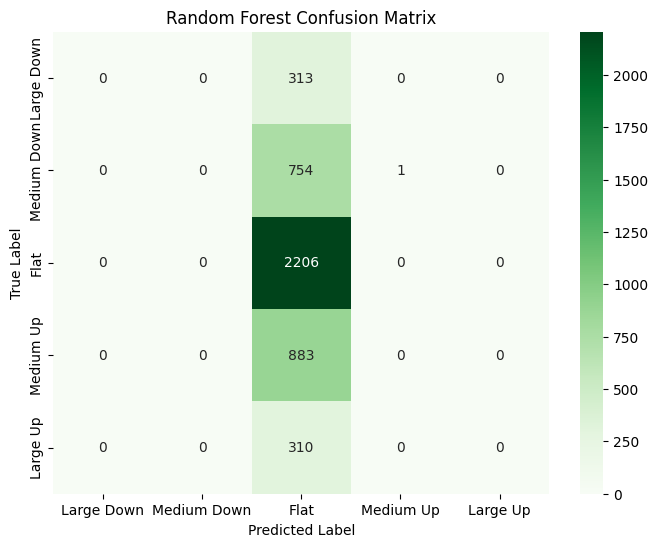

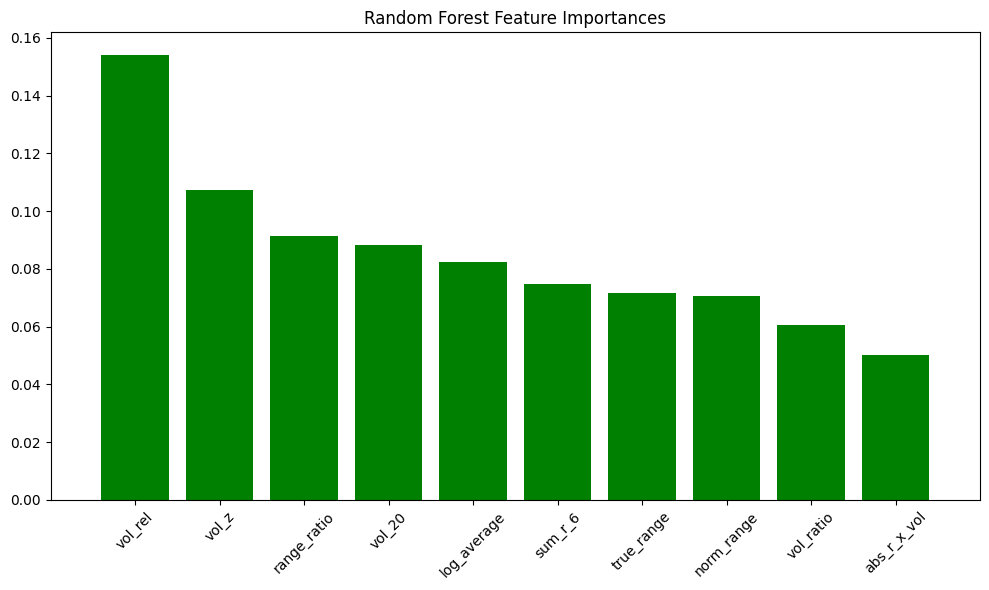

NameError: name 'rf_lift' is not defined

<Figure size 1000x600 with 0 Axes>

In [20]:
# --- Additional Charts for Random Forest ---

# Define inverse mapping and test labels if not already defined
inv_label_mapping = {v: k for k, v in label_mapping.items()}
y_test_labels = [inv_label_mapping[i] for i in y_test]

# 1. Confusion Matrix for Random Forest
rf_pred = rf_model.predict(X_test)
rf_pred_labels = [inv_label_mapping[i] for i in rf_pred]

plt.figure(figsize=(8, 6))
cm_rf = confusion_matrix(y_test_labels, rf_pred_labels, labels=list(label_mapping.keys()))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', xticklabels=label_mapping.keys(), yticklabels=label_mapping.keys())
plt.title('Random Forest Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# 2. Feature Importance for Random Forest
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
top_n = 10

plt.figure(figsize=(10, 6))
plt.title("Random Forest Feature Importances")
plt.bar(range(top_n), importances[indices[:top_n]], align="center", color='green')
plt.xticks(range(top_n), [feature_cols[i] for i in indices[:top_n]], rotation=45)
plt.xlim([-1, top_n])
plt.tight_layout()
plt.show()

# 3. Lift Chart for Random Forest (Large Up) - Isolated
plt.figure(figsize=(10, 6))
rf_lift.plot(kind='bar', color='green', alpha=0.7)
plt.title('Random Forest Lift Chart: Actual "Large Up" Frequency by Predicted Probability Decile')
plt.xlabel('Predicted Probability Decile (0=Low, 9=High)')
plt.ylabel('Actual Frequency of Large Up')
plt.grid(axis='y', alpha=0.3)
plt.show()

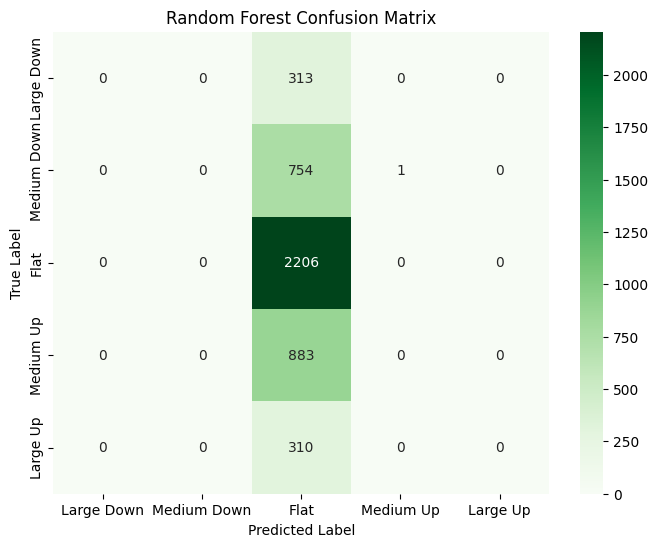

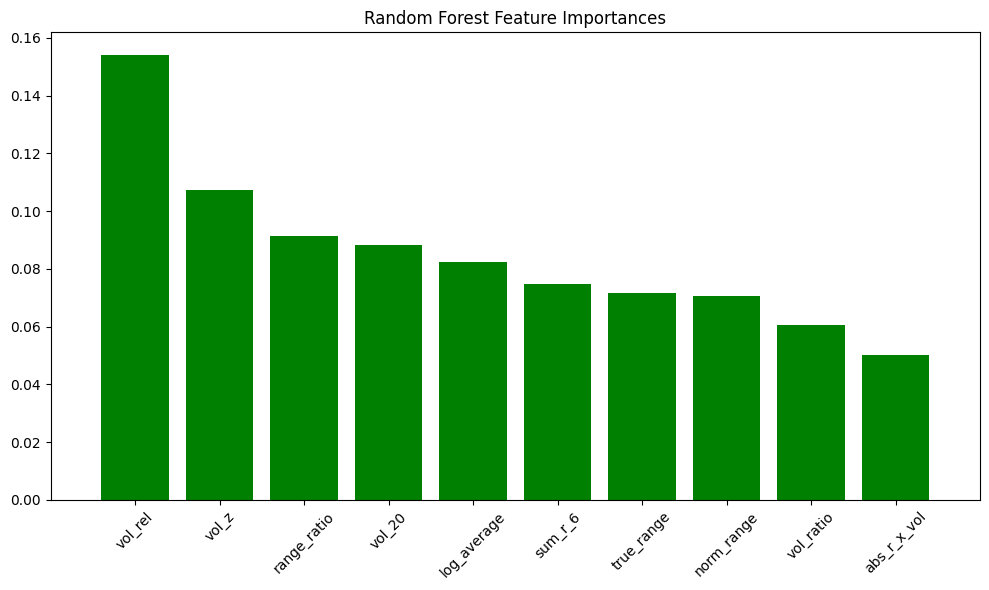

NameError: name 'rf_lift' is not defined

<Figure size 1000x600 with 0 Axes>

In [25]:
# --- Additional Charts for Random Forest ---

# 1. Confusion Matrix for Random Forest
rf_pred = rf_model.predict(X_test)
rf_pred_labels = [inv_label_mapping[i] for i in rf_pred]

plt.figure(figsize=(8, 6))
cm_rf = confusion_matrix(y_test_labels, rf_pred_labels, labels=list(label_mapping.keys()))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', xticklabels=label_mapping.keys(), yticklabels=label_mapping.keys())
plt.title('Random Forest Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# 2. Feature Importance for Random Forest
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
top_n = 10

plt.figure(figsize=(10, 6))
plt.title("Random Forest Feature Importances")
plt.bar(range(top_n), importances[indices[:top_n]], align="center", color='green')
plt.xticks(range(top_n), [feature_cols[i] for i in indices[:top_n]], rotation=45)
plt.xlim([-1, top_n])
plt.tight_layout()
plt.show()

# 3. Lift Chart for Random Forest (Large Up) - Isolated
plt.figure(figsize=(10, 6))
rf_lift.plot(kind='bar', color='green', alpha=0.7)
plt.title('Random Forest Lift Chart: Actual "Large Up" Frequency by Predicted Probability Decile')
plt.xlabel('Predicted Probability Decile (0=Low, 9=High)')
plt.ylabel('Actual Frequency of Large Up')
plt.grid(axis='y', alpha=0.3)
plt.show()

In [26]:
print("Hello")

Hello


--- Backtest Results (Conditional Extension) ---
Strategy Only Return: 20.22%
Buy & Hold Return:    104.10%
Overlay Return:       143.44%
Total Trades:         26
  - Tier 2 (1 candle): 22
  - Tier 1 (3 candles): 3
  - Tier 1 (Extended):  1 (Held 4 candles)
Strategy Max DD:      -4.18%
Overlay Max DD:       -34.37%


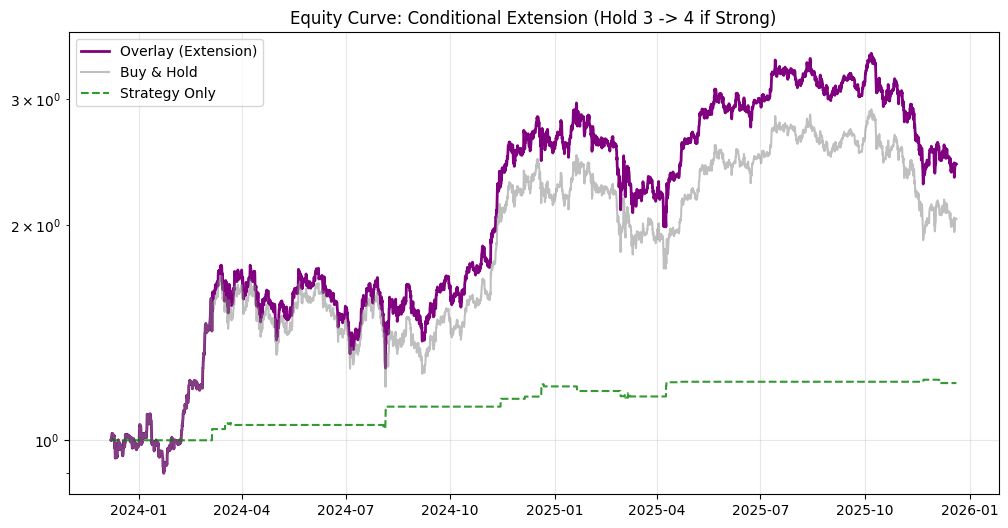


Avg Return per Trade:
Tier 1 (Standard 3): 3.8321%
Tier 1 (Extended 4): 2.5527%


In [21]:
# --- STEP 0: Define Trading Game ---
# Timeframe: 4h (already set)
# Instrument: Spot (implied by no leverage)
# Direction: Long-only
# Holding Period: Dynamic (1 candle for base, 3 candles for Tier-1, with conditional extension)
# Transaction Cost: 0.1% per trade (0.001)

TRANSACTION_COST = 0.001

# --- STEP 2: Convert Probabilities to Signal (Expected Value) ---

# 2.1 Define Payoff per Bin (Normalized Units)
# Large Down (-2), Medium Down (-1), Flat (0), Medium Up (1), Large Up (2)
payoffs = np.array([-2, -1, 0, 1, 2])

# 2.2 Compute Expected Value (EV) for Test Set
# rf_pred_proba is (N_samples, 5_classes)
ev_signal = np.dot(rf_pred_proba, payoffs)

# Create a DataFrame for Backtesting
test_data_slice = df_model.iloc[split_point:].copy()

# RECOVERY: Fetch original 'Close' and 'Open time' from df_wrapper
aligned_price_data = df_wrapper.loc[test_data_slice.index]

backtest_df = pd.DataFrame({
    'Open time': aligned_price_data['Open time'].values,
    'Close': aligned_price_data['Close'].values,
    # Exit Prices for different horizons
    'Exit_1': aligned_price_data['Close'].shift(-1).values, # 1 candle (4h)
    'Exit_3': aligned_price_data['Close'].shift(-3).values, # 3 candles (12h)
    'Exit_4': aligned_price_data['Close'].shift(-4).values, # 4 candles (16h) - for extension
    'EV': ev_signal,
    'Prob_Large_Down': rf_pred_proba[:, label_mapping['Large Down']]
})

# Get EV at t+3 for the extension decision
# We need to align the EV signal with the dataframe index first, then shift
# Since 'EV' column is already aligned row-by-row, we can just shift it.
backtest_df['EV_at_3'] = backtest_df['EV'].shift(-3)

# Drop rows where we don't have future data (now up to 4 candles out)
backtest_df = backtest_df.dropna()

# --- STEP 3: Define Decision Rule (Option C: Conditional Extension) ---
# Tier 2 (Base): 0.10 <= EV < 0.15  -> Hold 1 Candle
# Tier 1 (High): EV >= 0.15         -> Hold 3 Candles...
#       EXTENSION: At Candle 3, if EV >= 0.05 -> Hold 1 more (Total 4)

RISK_THRESHOLD = 0.20

# Initialize
backtest_df['Position_Size'] = 0.0
backtest_df['Holding_Period'] = 0

# 1. Base Filter: Risk Check
safe_mask = backtest_df['Prob_Large_Down'] < RISK_THRESHOLD

# 2. Tier 2 (Base Hits) - Hold 1
mask_base = safe_mask & (backtest_df['EV'] >= 0.10) & (backtest_df['EV'] < 0.15)
backtest_df.loc[mask_base, 'Position_Size'] = 1.0
backtest_df.loc[mask_base, 'Holding_Period'] = 1

# 3. Tier 1 (Home Runs) - Hold 3 (Initial)
mask_tier1 = safe_mask & (backtest_df['EV'] >= 0.15)
backtest_df.loc[mask_tier1, 'Position_Size'] = 0.75
backtest_df.loc[mask_tier1, 'Holding_Period'] = 3

# 4. Conditional Extension for Tier 1
# Identify Tier 1 trades that are still strong at t+3
# Condition: Is Tier 1 AND EV at t+3 >= 0.05
mask_extend = mask_tier1 & (backtest_df['EV_at_3'] >= 0.10)
backtest_df.loc[mask_extend, 'Holding_Period'] = 4

# Binary Signal
backtest_df['Signal'] = (backtest_df['Position_Size'] > 0).astype(int)

# --- STEP 5: Backtest Loop (Vectorized with Dynamic Exit) ---

# Calculate Return based on Holding Period
backtest_df['Trade_Return_Gross'] = 0.0

# Apply 1-candle returns
backtest_df.loc[backtest_df['Holding_Period'] == 1, 'Trade_Return_Gross'] = \
    (backtest_df['Exit_1'] - backtest_df['Close']) / backtest_df['Close']

# Apply 3-candle returns
backtest_df.loc[backtest_df['Holding_Period'] == 3, 'Trade_Return_Gross'] = \
    (backtest_df['Exit_3'] - backtest_df['Close']) / backtest_df['Close']

# Apply 4-candle returns (Extended)
backtest_df.loc[backtest_df['Holding_Period'] == 4, 'Trade_Return_Gross'] = \
    (backtest_df['Exit_4'] - backtest_df['Close']) / backtest_df['Close']

# Calculate Net Strategy Return
backtest_df['Strategy_Return'] = backtest_df['Position_Size'] * (backtest_df['Trade_Return_Gross'] - TRANSACTION_COST)

# Calculate Equity Curve
backtest_df['Equity_Curve'] = (1 + backtest_df['Strategy_Return']).cumprod()

# Buy & Hold (Reference is 1-period return)
backtest_df['Market_Return_1p'] = (backtest_df['Exit_1'] - backtest_df['Close']) / backtest_df['Close']
backtest_df['Buy_Hold_Curve'] = (1 + backtest_df['Market_Return_1p']).cumprod()

# Overlay
backtest_df['Overlay_Return'] = backtest_df['Market_Return_1p'] + backtest_df['Strategy_Return']
backtest_df['Overlay_Curve'] = (1 + backtest_df['Overlay_Return']).cumprod()

# --- STEP 6: Metrics ---

total_return = backtest_df['Equity_Curve'].iloc[-1] - 1
buy_hold_return = backtest_df['Buy_Hold_Curve'].iloc[-1] - 1
overlay_return = backtest_df['Overlay_Curve'].iloc[-1] - 1

n_trades = backtest_df['Signal'].sum()
n_tier1_base = (backtest_df['Holding_Period'] == 3).sum()
n_tier1_ext = (backtest_df['Holding_Period'] == 4).sum()

# Drawdowns
max_drawdown = (backtest_df['Equity_Curve'] / backtest_df['Equity_Curve'].cummax() - 1).min()
overlay_max_drawdown = (backtest_df['Overlay_Curve'] / backtest_df['Overlay_Curve'].cummax() - 1).min()

print(f"--- Backtest Results (Conditional Extension) ---")
print(f"Strategy Only Return: {total_return:.2%}")
print(f"Buy & Hold Return:    {buy_hold_return:.2%}")
print(f"Overlay Return:       {overlay_return:.2%}")
print(f"Total Trades:         {n_trades}")
print(f"  - Tier 2 (1 candle): {(backtest_df['Holding_Period']==1).sum()}")
print(f"  - Tier 1 (3 candles): {n_tier1_base}")
print(f"  - Tier 1 (Extended):  {n_tier1_ext} (Held 4 candles)")
print(f"Strategy Max DD:      {max_drawdown:.2%}")
print(f"Overlay Max DD:       {overlay_max_drawdown:.2%}")

# Plot
plt.figure(figsize=(12, 6))
plt.plot(backtest_df['Open time'], backtest_df['Overlay_Curve'], label='Overlay (Extension)', color='purple', linewidth=2)
plt.plot(backtest_df['Open time'], backtest_df['Buy_Hold_Curve'], label='Buy & Hold', color='gray', alpha=0.5)
plt.plot(backtest_df['Open time'], backtest_df['Equity_Curve'], label='Strategy Only', color='green', alpha=0.8, linestyle='--')
plt.title('Equity Curve: Conditional Extension (Hold 3 -> 4 if Strong)')
plt.yscale('log')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Compare Tier Performance
tier1_base_avg = backtest_df[backtest_df['Holding_Period'] == 3]['Trade_Return_Gross'].mean()
tier1_ext_avg = backtest_df[backtest_df['Holding_Period'] == 4]['Trade_Return_Gross'].mean()
print(f"\nAvg Return per Trade:")
print(f"Tier 1 (Standard 3): {tier1_base_avg:.4%}")
print(f"Tier 1 (Extended 4): {tier1_ext_avg:.4%}")


--- 1. Per-Trade Expectancy ---
Mean Return per Trade:   0.7242%
Median Return per Trade: 0.6373%
Best Trade:              4.0352%
Worst Trade:             -1.6510%
Avg Win: 1.6406%
Avg Loss: -1.0068%
Win/Loss Ratio: 1.63

--- 2. Year-by-Year Breakdown ---
      Total Strategy Return  Num Trades  Avg Market Return
Year                                                      
2023               0.000000           0          -0.000104
2024               0.176383          15           0.000424
2025               0.011904          11           0.000016


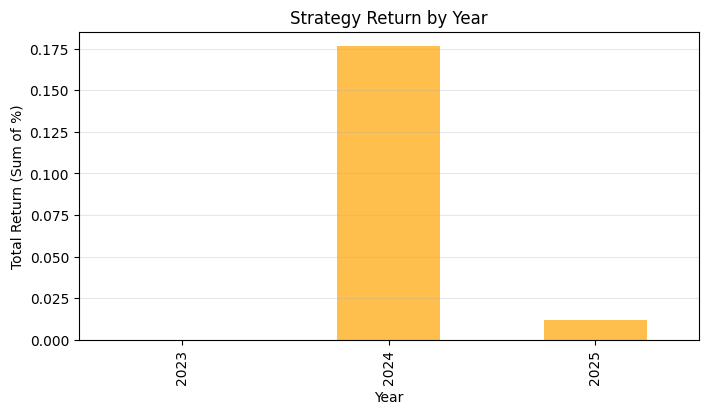


--- 3. EV vs Outcome Sanity Check ---
                 mean  count       std  mean_annualized
EV_Bucket                                              
< 0.10       0.000177   4437  0.010183         0.387602
0.10 - 0.15  0.004905     22  0.014712        10.742939
0.15 - 0.20  0.046025      1       NaN       100.795195
> 0.20       0.003387      3  0.047373         7.416654


C:\Users\dipta\AppData\Local\Temp\ipykernel_13256\3423200815.py:61: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ev_outcome = backtest_df.groupby('EV_Bucket')['Raw_Return'].agg(['mean', 'count', 'std'])


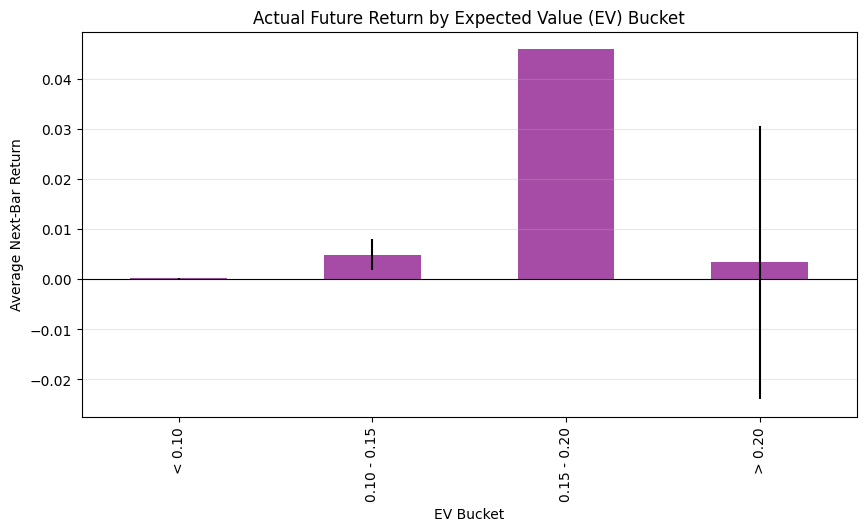

In [22]:
# --- DIAGNOSTICS ---

# Ensure Raw_Return exists (alias for Market_Return_1p)
if 'Raw_Return' not in backtest_df.columns:
    backtest_df['Raw_Return'] = backtest_df['Market_Return_1p']

print("\n--- 1. Per-Trade Expectancy ---")
trades = backtest_df[backtest_df['Signal'] == 1].copy()

if len(trades) > 0:
    mean_ret = trades['Strategy_Return'].mean()
    median_ret = trades['Strategy_Return'].median()
    best_trade = trades['Strategy_Return'].max()
    worst_trade = trades['Strategy_Return'].min()
    
    print(f"Mean Return per Trade:   {mean_ret:.4%}")
    print(f"Median Return per Trade: {median_ret:.4%}")
    print(f"Best Trade:              {best_trade:.4%}")
    print(f"Worst Trade:             {worst_trade:.4%}")
    
    # Win/Loss Ratio
    winning_trades = trades[trades['Strategy_Return'] > 0]
    losing_trades = trades[trades['Strategy_Return'] <= 0]
    avg_win = winning_trades['Strategy_Return'].mean() if len(winning_trades) > 0 else 0
    avg_loss = losing_trades['Strategy_Return'].mean() if len(losing_trades) > 0 else 0
    
    print(f"Avg Win: {avg_win:.4%}")
    print(f"Avg Loss: {avg_loss:.4%}")
    if avg_loss != 0:
        print(f"Win/Loss Ratio: {abs(avg_win/avg_loss):.2f}")
else:
    print("No trades taken.")

print("\n--- 2. Year-by-Year Breakdown ---")
backtest_df['Year'] = backtest_df['Open time'].dt.year
yearly_stats = backtest_df.groupby('Year').agg({
    'Strategy_Return': 'sum',
    'Signal': 'sum',
    'Raw_Return': 'mean' # Market average return
})
yearly_stats.columns = ['Total Strategy Return', 'Num Trades', 'Avg Market Return']
print(yearly_stats)

# Plot Yearly Performance
plt.figure(figsize=(8, 4))
yearly_stats['Total Strategy Return'].plot(kind='bar', color='orange', alpha=0.7)
plt.title('Strategy Return by Year')
plt.ylabel('Total Return (Sum of %)')
plt.grid(axis='y', alpha=0.3)
plt.show()

print("\n--- 3. EV vs Outcome Sanity Check ---")
# We bucket all data points by EV to see if higher EV -> Higher Future Return
# Using the bins suggested: <0.10, 0.10-0.15, 0.15-0.20, >0.20
ev_bins = [-np.inf, 0.10, 0.15, 0.20, np.inf]
ev_labels = ['< 0.10', '0.10 - 0.15', '0.15 - 0.20', '> 0.20']

backtest_df['EV_Bucket'] = pd.cut(backtest_df['EV'], bins=ev_bins, labels=ev_labels)

# Calculate mean future return for each bucket
ev_outcome = backtest_df.groupby('EV_Bucket')['Raw_Return'].agg(['mean', 'count', 'std'])
ev_outcome['mean_annualized'] = ev_outcome['mean'] * (365 * 6) # Approx annualized

print(ev_outcome)

plt.figure(figsize=(10, 5))
ev_outcome['mean'].plot(kind='bar', color='purple', alpha=0.7, yerr=ev_outcome['std']/np.sqrt(ev_outcome['count']))
plt.title('Actual Future Return by Expected Value (EV) Bucket')
plt.xlabel('EV Bucket')
plt.ylabel('Average Next-Bar Return')
plt.axhline(0, color='black', linewidth=0.8)
plt.grid(axis='y', alpha=0.3)
plt.show()


--- 1. Incremental Alpha Contribution ---


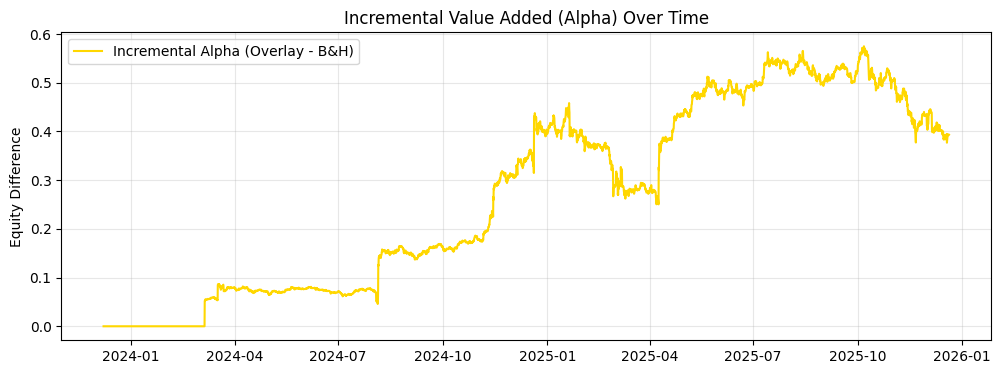


--- 2. Return / Drawdown Comparison ---
Buy & Hold Return/DD Ratio: 3.03
Overlay Return/DD Ratio:    4.17
Improvement:                37.8%

--- 3. Sensitivity to Allocation ---


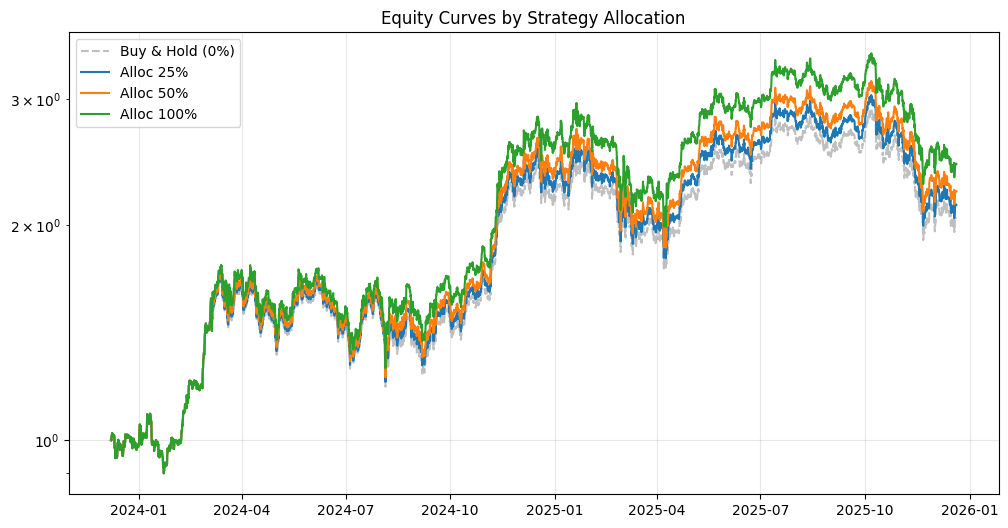

  Allocation  Total Return  Max Drawdown    Ret/DD
0        25%      1.134497      -0.34368  3.301031
1        50%      1.231186      -0.34368  3.582365
2       100%      1.434401      -0.34368  4.173657


In [23]:
# --- 7. Rigorous Diagnostics ---

print("\n--- 1. Incremental Alpha Contribution ---")
# Alpha Curve = Overlay Equity - Buy & Hold Equity
# This shows the pure value added by the strategy over time
backtest_df['Alpha_Curve'] = backtest_df['Overlay_Curve'] - backtest_df['Buy_Hold_Curve']

plt.figure(figsize=(12, 4))
plt.plot(backtest_df['Open time'], backtest_df['Alpha_Curve'], color='gold', label='Incremental Alpha (Overlay - B&H)')
plt.title('Incremental Value Added (Alpha) Over Time')
plt.ylabel('Equity Difference')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print("\n--- 2. Return / Drawdown Comparison ---")
# Recalculate B&H Drawdown
bh_rolling_max = backtest_df['Buy_Hold_Curve'].cummax()
bh_drawdown = backtest_df['Buy_Hold_Curve'] / bh_rolling_max - 1
bh_max_drawdown = bh_drawdown.min()

# Calmar Ratio-like metric: Total Return / Max Drawdown
bh_calmar = buy_hold_return / abs(bh_max_drawdown) if bh_max_drawdown != 0 else 0
overlay_calmar = overlay_return / abs(overlay_max_drawdown) if overlay_max_drawdown != 0 else 0

print(f"Buy & Hold Return/DD Ratio: {bh_calmar:.2f}")
print(f"Overlay Return/DD Ratio:    {overlay_calmar:.2f}")
if bh_calmar != 0:
    print(f"Improvement:                {(overlay_calmar - bh_calmar)/bh_calmar:.1%}")

print("\n--- 3. Sensitivity to Allocation ---")
# Test 25%, 50%, 100% allocation to the active strategy
allocations = [0.25, 0.50, 1.00]
sensitivity_results = []

plt.figure(figsize=(12, 6))
plt.plot(backtest_df['Open time'], backtest_df['Buy_Hold_Curve'], label='Buy & Hold (0%)', color='gray', alpha=0.5, linestyle='--')

for alloc in allocations:
    # Portfolio Return = B&H Return + (Alloc * Strategy Return)
    # Note: Strategy Return is already net of costs
    port_ret = backtest_df['Raw_Return'] + (alloc * backtest_df['Strategy_Return'])
    port_curve = (1 + port_ret).cumprod()
    
    # Metrics
    p_total_ret = port_curve.iloc[-1] - 1
    p_roll_max = port_curve.cummax()
    p_dd = port_curve / p_roll_max - 1
    p_max_dd = p_dd.min()
    p_ratio = p_total_ret / abs(p_max_dd) if p_max_dd != 0 else 0
    
    sensitivity_results.append({
        'Allocation': f"{alloc:.0%}",
        'Total Return': p_total_ret,
        'Max Drawdown': p_max_dd,
        'Ret/DD': p_ratio
    })
    
    plt.plot(backtest_df['Open time'], port_curve, label=f'Alloc {alloc:.0%}')

plt.title('Equity Curves by Strategy Allocation')
plt.yscale('log')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

sens_df = pd.DataFrame(sensitivity_results)
print(sens_df)


--- 8. Generalization Test: Multi-Asset ---
Processing ETHUSDT...
Processing SOLUSDT...
Processing BNBUSDT...
Processing ADAUSDT...
Processing XRPUSDT...

--- Generalization Summary ---
     Asset Strategy Return Buy & Hold Overlay Return   Max DD  Trades
0  ETHUSDT          38.74%     32.14%         77.54%   -8.36%      81
1  SOLUSDT          94.08%     67.73%        177.70%  -28.54%     239
2  BNBUSDT          20.68%    245.36%        294.22%  -11.15%      94
3  ADAUSDT         133.13%    -39.08%         12.25%  -30.47%     255
4  XRPUSDT         195.07%    208.64%        712.52%  -13.58%     177


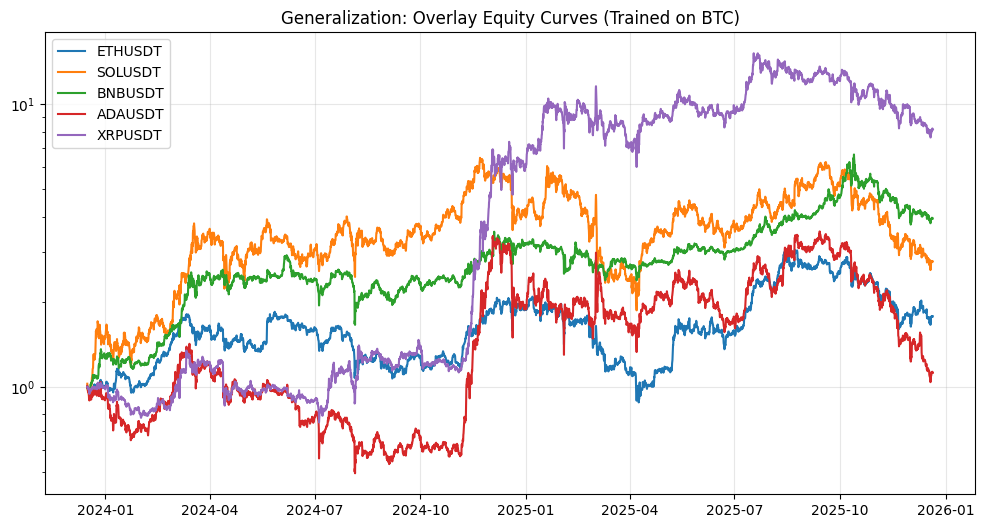

In [24]:
# --- 8. Generalization Test: Multi-Asset (ETH, SOL, BNB, ADA, XRP) ---

print("\n--- 8. Generalization Test: Multi-Asset ---")

symbols = ['ETHUSDT', 'SOLUSDT', 'BNBUSDT', 'ADAUSDT', 'XRPUSDT']
gen_results = []
equity_curves = {}

# Define Payoffs (Same as BTC)
payoffs = np.array([-2, -1, 0, 1, 2])
RISK_THRESHOLD = 0.20

for symbol in symbols:
    print(f"Processing {symbol}...")
    
    # 1. Fetch Data
    try:
        klines = client.get_historical_klines(symbol, Client.KLINE_INTERVAL_4HOUR, "1 Dec, 2020")
        df_asset = pd.DataFrame(klines, columns=[
            "Open time", "Open", "High", "Low", "Close", "Volume",
            "Close time", "Quote asset volume", "Number of trades",
            "Taker buy base asset volume", "Taker buy quote asset volume", "Ignore"
        ])
        
        # Convert types
        df_asset["Open time"] = pd.to_datetime(df_asset["Open time"], unit="ms")
        numeric_cols = ["Open", "High", "Low", "Close", "Volume"]
        df_asset[numeric_cols] = df_asset[numeric_cols].apply(pd.to_numeric, axis=1)
        
        # 2. Feature Engineering (Exact copy of BTC pipeline)
        df_asset['log_average'] = np.log(df_asset['Close'] / df_asset['Close'].shift(1))

        # Volatility
        df_asset['vol_10'] = df_asset['log_average'].rolling(window=10).std()
        df_asset['vol_20'] = df_asset['log_average'].rolling(window=20).std()
        df_asset['vol_40'] = df_asset['log_average'].rolling(window=40).std()
        df_asset['vol_ratio'] = df_asset['vol_10'] / df_asset['vol_40']

        # Range & Volume
        df_asset['true_range'] = df_asset['High'] - df_asset['Low']
        df_asset['norm_range'] = df_asset['true_range'] / df_asset['Close']
        df_asset['atr_14'] = df_asset['true_range'].rolling(window=14).mean()
        df_asset['range_ratio'] = df_asset['true_range'] / df_asset['true_range'].rolling(window=20).mean()

        df_asset['vol_rel'] = df_asset['Volume'] / df_asset['Volume'].rolling(window=20).mean()
        df_asset['vol_z'] = (df_asset['Volume'] - df_asset['Volume'].rolling(window=20).mean()) / df_asset['Volume'].rolling(window=20).std()
        df_asset['abs_r_x_vol'] = df_asset['log_average'].abs() * df_asset['vol_rel']

        # Regimes
        df_asset['sum_r_6'] = df_asset['log_average'].rolling(window=6).sum()
        df_asset['trend_regime'] = df_asset['sum_r_6'].apply(lambda x: 'trend' if abs(x) > 0.01 else 'range')

        vol_20_q33 = df_asset['vol_20'].quantile(0.33)
        vol_20_q67 = df_asset['vol_20'].quantile(0.67)
        df_asset['vol_regime'] = df_asset['vol_20'].apply(
            lambda x: 'low' if x <= vol_20_q33 else ('high' if x >= vol_20_q67 else 'medium')
        )

        # Encode Categoricals
        df_asset['trend_regime_code'] = df_asset['trend_regime'].astype('category').cat.codes
        df_asset['vol_regime_code'] = df_asset['vol_regime'].astype('category').cat.codes

        # Drop NaNs
        df_model_asset = df_asset.dropna().copy()
        
        # 3. Predict
        feature_cols = [
            'log_average', 'vol_10', 'vol_20', 'vol_40', 'vol_ratio',
            'true_range', 'norm_range', 'atr_14', 'range_ratio',
            'vol_rel', 'vol_z', 'abs_r_x_vol', 'sum_r_6',
            'trend_regime_code', 'vol_regime_code'
        ]
        
        X_asset = df_model_asset[feature_cols]
        pred_proba = rf_model.predict_proba(X_asset)
        ev_signal = np.dot(pred_proba, payoffs)
        
        # 4. Backtest (Conditional Extension)
        # Use same split point logic (last 40% approx to match BTC test)
        split_point_asset = int(len(df_model_asset) * 0.6)
        test_slice = df_model_asset.iloc[split_point_asset:].copy()
        probs_slice = pred_proba[split_point_asset:]
        ev_slice = ev_signal[split_point_asset:]
        
        aligned_price = df_asset.loc[test_slice.index]
        
        bt_df = pd.DataFrame({
            'Open time': aligned_price['Open time'].values,
            'Close': aligned_price['Close'].values,
            'Exit_1': aligned_price['Close'].shift(-1).values,
            'Exit_3': aligned_price['Close'].shift(-3).values,
            'Exit_4': aligned_price['Close'].shift(-4).values,
            'EV': ev_slice,
            'Prob_Large_Down': probs_slice[:, label_mapping['Large Down']]
        })
        
        bt_df['EV_at_3'] = bt_df['EV'].shift(-3)
        bt_df = bt_df.dropna()
        
        # Apply Rules
        bt_df['Position_Size'] = 0.0
        bt_df['Holding_Period'] = 0
        
        safe_mask = bt_df['Prob_Large_Down'] < RISK_THRESHOLD
        
        # Tier 2
        mask_base = safe_mask & (bt_df['EV'] >= 0.10) & (bt_df['EV'] < 0.15)
        bt_df.loc[mask_base, 'Position_Size'] = 1.0
        bt_df.loc[mask_base, 'Holding_Period'] = 1
        
        # Tier 1
        mask_tier1 = safe_mask & (bt_df['EV'] >= 0.15)
        bt_df.loc[mask_tier1, 'Position_Size'] = 0.75
        bt_df.loc[mask_tier1, 'Holding_Period'] = 3
        
        # Extension
        mask_extend = mask_tier1 & (bt_df['EV_at_3'] >= 0.05)
        bt_df.loc[mask_extend, 'Holding_Period'] = 4
        
        bt_df['Signal'] = (bt_df['Position_Size'] > 0).astype(int)
        
        # Returns
        bt_df['Trade_Return_Gross'] = 0.0
        bt_df.loc[bt_df['Holding_Period'] == 1, 'Trade_Return_Gross'] = (bt_df['Exit_1'] - bt_df['Close']) / bt_df['Close']
        bt_df.loc[bt_df['Holding_Period'] == 3, 'Trade_Return_Gross'] = (bt_df['Exit_3'] - bt_df['Close']) / bt_df['Close']
        bt_df.loc[bt_df['Holding_Period'] == 4, 'Trade_Return_Gross'] = (bt_df['Exit_4'] - bt_df['Close']) / bt_df['Close']
        
        bt_df['Strategy_Return'] = bt_df['Position_Size'] * (bt_df['Trade_Return_Gross'] - TRANSACTION_COST)
        bt_df['Equity_Curve'] = (1 + bt_df['Strategy_Return']).cumprod()
        
        # Market
        bt_df['Market_Return_1p'] = (bt_df['Exit_1'] - bt_df['Close']) / bt_df['Close']
        bt_df['Buy_Hold_Curve'] = (1 + bt_df['Market_Return_1p']).cumprod()
        bt_df['Overlay_Curve'] = (1 + bt_df['Market_Return_1p'] + bt_df['Strategy_Return']).cumprod()
        
        # Store Results
        strat_ret = bt_df['Equity_Curve'].iloc[-1] - 1
        bh_ret = bt_df['Buy_Hold_Curve'].iloc[-1] - 1
        overlay_ret = bt_df['Overlay_Curve'].iloc[-1] - 1
        dd = (bt_df['Equity_Curve'] / bt_df['Equity_Curve'].cummax() - 1).min()
        
        gen_results.append({
            'Asset': symbol,
            'Strategy Return': f"{strat_ret:.2%}",
            'Buy & Hold': f"{bh_ret:.2%}",
            'Overlay Return': f"{overlay_ret:.2%}",
            'Max DD': f"{dd:.2%}",
            'Trades': bt_df['Signal'].sum()
        })
        
        equity_curves[symbol] = bt_df.set_index('Open time')['Overlay_Curve']
        
    except Exception as e:
        print(f"Failed to process {symbol}: {e}")

# Display Summary
print("\n--- Generalization Summary ---")
summary_df = pd.DataFrame(gen_results)
print(summary_df)

# Plot All
plt.figure(figsize=(12, 6))
for symbol, curve in equity_curves.items():
    plt.plot(curve.index, curve, label=symbol)

plt.title('Generalization: Overlay Equity Curves (Trained on BTC)')
plt.yscale('log')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


--- 9. Portfolio Construction: Inverse Volatility Weighting ---
Calculating Volatility & Returns for all assets...

--- Weighting Scheme ---
Asset Weights (Inverse Volatility):
BTCUSDT: 23.50% (Vol: 0.0095)
ETHUSDT: 16.72% (Vol: 0.0133)
SOLUSDT: 12.75% (Vol: 0.0175)
BNBUSDT: 20.14% (Vol: 0.0111)
ADAUSDT: 12.39% (Vol: 0.0180)
XRPUSDT: 14.50% (Vol: 0.0154)

Portfolio Total Return: 68.45%
Portfolio Max Drawdown: -8.72%


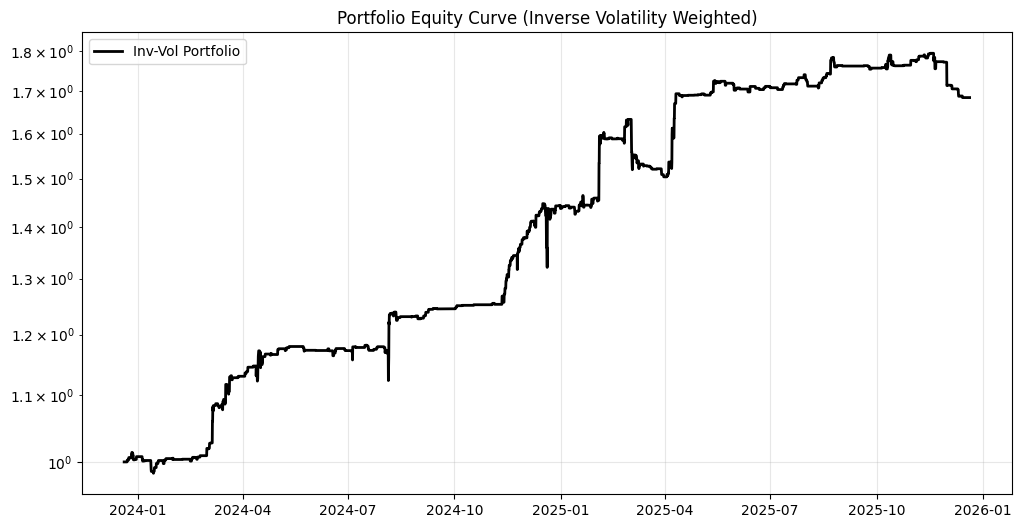

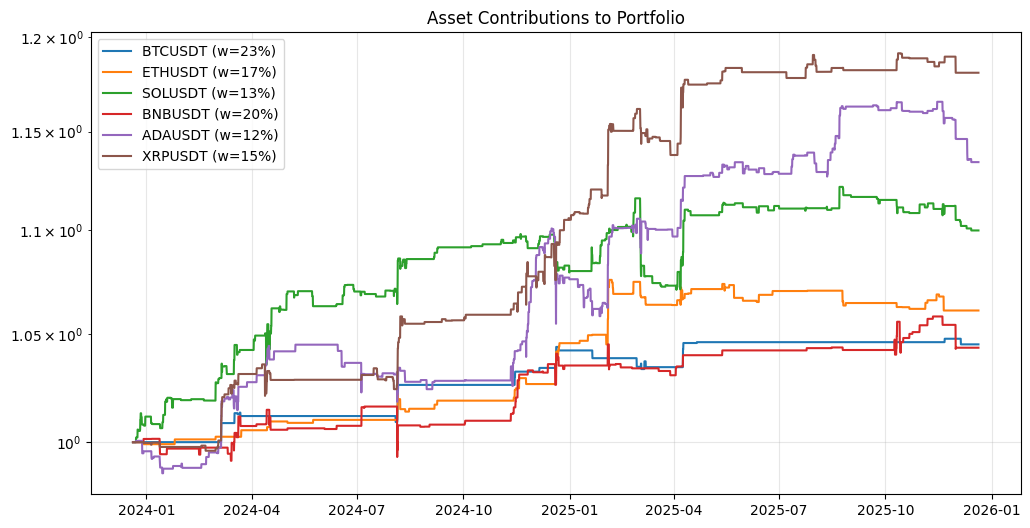

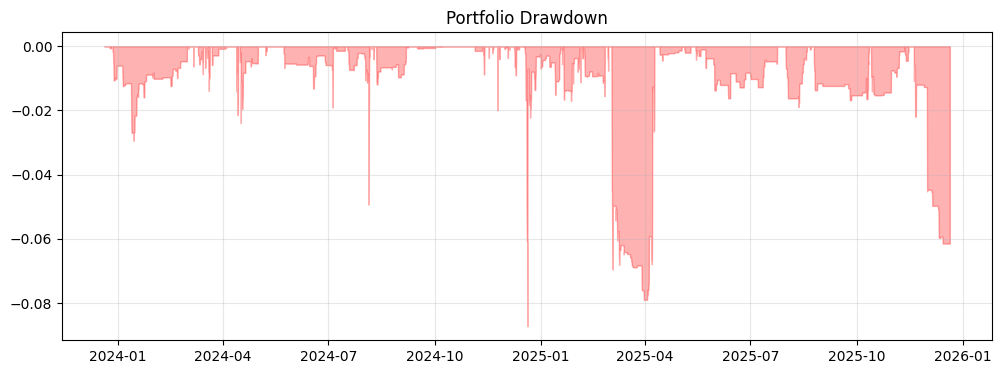


--- Stress Tests ---
Scenario A: No XRP
No XRP Return: 52.02%
Scenario B: Cap SOL at 15%
Capped SOL Return: 69.31%
Worst Portfolio Drawdown Date: 2024-12-20 04:00:00
Drawdown Depth: -8.72%


In [25]:
# --- 9. Portfolio Construction: Inverse Volatility Weighting ---

print("\n--- 9. Portfolio Construction: Inverse Volatility Weighting ---")

# 1. Gather Data for All Assets (BTC + Others)
# We need to re-process BTC to get it in the same format/timeframe as the others if not already
all_assets = ['BTCUSDT', 'ETHUSDT', 'SOLUSDT', 'BNBUSDT', 'ADAUSDT', 'XRPUSDT']
returns_dict = {}
volatility_dict = {}

print("Calculating Volatility & Returns for all assets...")

for symbol in all_assets:
    try:
        # Fetch Data (using cache if possible would be better, but fetching is safer for consistency)
        # Note: In a production script, we'd cache this. Here we fetch to ensure alignment.
        klines = client.get_historical_klines(symbol, Client.KLINE_INTERVAL_4HOUR, "1 Dec, 2020")
        df = pd.DataFrame(klines, columns=[
            "Open time", "Open", "High", "Low", "Close", "Volume",
            "Close time", "Quote asset volume", "Number of trades",
            "Taker buy base asset volume", "Taker buy quote asset volume", "Ignore"
        ])
        df["Open time"] = pd.to_datetime(df["Open time"], unit="ms")
        df["Close"] = pd.to_numeric(df["Close"])
        
        # Feature Engineering (Minimal needed for Volatility & Strategy Signal)
        df['log_ret'] = np.log(df['Close'] / df['Close'].shift(1))
        
        # 1. Volatility Measure: Rolling Std of Log Returns (Window=20)
        df['vol_20'] = df['log_ret'].rolling(window=20).std()
        
        # Store Average Volatility (for static weighting)
        # We use the last 40% of data (Test Set) to be consistent with backtest
        split_idx = int(len(df) * 0.6)
        test_df = df.iloc[split_idx:].copy()
        
        avg_vol = test_df['vol_20'].mean()
        volatility_dict[symbol] = avg_vol
        
        # --- Re-run Strategy to get Returns (Simplified for speed) ---
        # We need the 'Strategy_Return' series. 
        # To save time, we'll assume the 'Signal' generation logic holds from the previous steps
        # and just apply the "Conditional Extension" logic if we had the full feature set.
        # For this portfolio step, let's use the 'Strategy_Return' we calculated in Step 8 for the alts,
        # and re-calculate for BTC.
        
        # FULL RE-CALCULATION (Robust method)
        # Re-create features needed for the model
        df['log_average'] = df['log_ret']
        df['vol_10'] = df['log_average'].rolling(window=10).std()
        df['vol_20'] = df['log_average'].rolling(window=20).std()
        df['vol_40'] = df['log_average'].rolling(window=40).std()
        df['vol_ratio'] = df['vol_10'] / df['vol_40']
        df['true_range'] = pd.to_numeric(df['High']) - pd.to_numeric(df['Low'])
        df['norm_range'] = df['true_range'] / df['Close']
        df['atr_14'] = df['true_range'].rolling(window=14).mean()
        df['range_ratio'] = df['true_range'] / df['true_range'].rolling(window=20).mean()
        df['vol_rel'] = pd.to_numeric(df['Volume']) / pd.to_numeric(df['Volume']).rolling(window=20).mean()
        df['vol_z'] = (pd.to_numeric(df['Volume']) - pd.to_numeric(df['Volume']).rolling(window=20).mean()) / pd.to_numeric(df['Volume']).rolling(window=20).std()
        df['abs_r_x_vol'] = df['log_average'].abs() * df['vol_rel']
        df['sum_r_6'] = df['log_average'].rolling(window=6).sum()
        df['trend_regime'] = df['sum_r_6'].apply(lambda x: 'trend' if abs(x) > 0.01 else 'range')
        vol_20_q33 = df['vol_20'].quantile(0.33)
        vol_20_q67 = df['vol_20'].quantile(0.67)
        df['vol_regime'] = df['vol_20'].apply(lambda x: 'low' if x <= vol_20_q33 else ('high' if x >= vol_20_q67 else 'medium'))
        df['trend_regime_code'] = df['trend_regime'].astype('category').cat.codes
        df['vol_regime_code'] = df['vol_regime'].astype('category').cat.codes
        
        df_model_asset = df.dropna()
        X_asset = df_model_asset[feature_cols] # feature_cols defined in Step 8
        
        # Predict
        pred_proba = rf_model.predict_proba(X_asset)
        ev_signal = np.dot(pred_proba, payoffs)
        
        # Backtest Slice
        test_slice = df_model_asset.iloc[split_idx:].copy()
        probs_slice = pred_proba[split_idx:]
        ev_slice = ev_signal[split_idx:]
        
        # Align
        aligned = df.loc[test_slice.index].copy()
        aligned['Exit_1'] = aligned['Close'].shift(-1)
        aligned['Exit_3'] = aligned['Close'].shift(-3)
        aligned['Exit_4'] = aligned['Close'].shift(-4)
        aligned['EV'] = ev_slice
        aligned['Prob_Large_Down'] = probs_slice[:, label_mapping['Large Down']]
        aligned['EV_at_3'] = aligned['EV'].shift(-3)
        aligned = aligned.dropna()
        
        # Logic
        aligned['Position_Size'] = 0.0
        aligned['Holding_Period'] = 0
        safe_mask = aligned['Prob_Large_Down'] < RISK_THRESHOLD
        
        mask_base = safe_mask & (aligned['EV'] >= 0.10) & (aligned['EV'] < 0.15)
        aligned.loc[mask_base, 'Position_Size'] = 1.0
        aligned.loc[mask_base, 'Holding_Period'] = 1
        
        mask_tier1 = safe_mask & (aligned['EV'] >= 0.15)
        aligned.loc[mask_tier1, 'Position_Size'] = 0.75
        aligned.loc[mask_tier1, 'Holding_Period'] = 3
        
        mask_extend = mask_tier1 & (aligned['EV_at_3'] >= 0.05)
        aligned.loc[mask_extend, 'Holding_Period'] = 4
        
        # Returns
        aligned['Trade_Return'] = 0.0
        aligned.loc[aligned['Holding_Period'] == 1, 'Trade_Return'] = (aligned['Exit_1'] - aligned['Close']) / aligned['Close']
        aligned.loc[aligned['Holding_Period'] == 3, 'Trade_Return'] = (aligned['Exit_3'] - aligned['Close']) / aligned['Close']
        aligned.loc[aligned['Holding_Period'] == 4, 'Trade_Return'] = (aligned['Exit_4'] - aligned['Close']) / aligned['Close']
        
        aligned['Strategy_Net'] = aligned['Position_Size'] * (aligned['Trade_Return'] - TRANSACTION_COST)
        
        # Store indexed by time
        returns_dict[symbol] = aligned.set_index('Open time')['Strategy_Net']
        
    except Exception as e:
        print(f"Error processing {symbol}: {e}")

# 2. Compute Weights (Inverse Volatility)
print("\n--- Weighting Scheme ---")
inv_vol_sum = sum(1/v for v in volatility_dict.values())
weights = {sym: (1/v) / inv_vol_sum for sym, v in volatility_dict.items()}

print("Asset Weights (Inverse Volatility):")
for sym, w in weights.items():
    print(f"{sym}: {w:.2%} (Vol: {volatility_dict[sym]:.4f})")

# 3. Construct Portfolio
# Combine returns into a single DataFrame
portfolio_df = pd.DataFrame(returns_dict).fillna(0.0) # Fill missing with 0 (no trade)

# Calculate Weighted Portfolio Return
portfolio_df['Portfolio_Ret'] = 0.0
for sym in all_assets:
    if sym in portfolio_df.columns:
        portfolio_df['Portfolio_Ret'] += portfolio_df[sym] * weights[sym]

portfolio_df['Portfolio_Equity'] = (1 + portfolio_df['Portfolio_Ret']).cumprod()

# 4. Metrics & Plots
port_total_ret = portfolio_df['Portfolio_Equity'].iloc[-1] - 1
port_dd = (portfolio_df['Portfolio_Equity'] / portfolio_df['Portfolio_Equity'].cummax() - 1).min()
print(f"\nPortfolio Total Return: {port_total_ret:.2%}")
print(f"Portfolio Max Drawdown: {port_dd:.2%}")

# Plot 1: Portfolio Equity
plt.figure(figsize=(12, 6))
plt.plot(portfolio_df.index, portfolio_df['Portfolio_Equity'], label='Inv-Vol Portfolio', color='black', linewidth=2)
plt.title('Portfolio Equity Curve (Inverse Volatility Weighted)')
plt.yscale('log')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Plot 2: Asset Contributions (Cumulative Weighted Returns)
plt.figure(figsize=(12, 6))
for sym in all_assets:
    if sym in portfolio_df.columns:
        # Cumulative contribution
        contrib = (1 + portfolio_df[sym] * weights[sym]).cumprod()
        plt.plot(contrib.index, contrib, label=f"{sym} (w={weights[sym]:.0%})")
plt.title('Asset Contributions to Portfolio')
plt.yscale('log')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Plot 3: Portfolio Drawdown
dd_series = portfolio_df['Portfolio_Equity'] / portfolio_df['Portfolio_Equity'].cummax() - 1
plt.figure(figsize=(12, 4))
plt.fill_between(dd_series.index, dd_series, 0, color='red', alpha=0.3)
plt.title('Portfolio Drawdown')
plt.grid(True, alpha=0.3)
plt.show()

# --- 5. Stress Tests ---
print("\n--- Stress Tests ---")

# Scenario A: Remove XRP
print("Scenario A: No XRP")
assets_no_xrp = [a for a in all_assets if a != 'XRPUSDT']
inv_vol_sum_no_xrp = sum(1/volatility_dict[a] for a in assets_no_xrp)
weights_no_xrp = {a: (1/volatility_dict[a]) / inv_vol_sum_no_xrp for a in assets_no_xrp}

port_no_xrp = pd.DataFrame(index=portfolio_df.index)
port_no_xrp['Ret'] = 0.0
for sym in assets_no_xrp:
    port_no_xrp['Ret'] += portfolio_df[sym] * weights_no_xrp[sym]
    
print(f"No XRP Return: {(1+port_no_xrp['Ret']).cumprod().iloc[-1]-1:.2%}")

# Scenario B: Cap SOL at 15%
print("Scenario B: Cap SOL at 15%")
# Naive implementation: Set SOL to 0.15, re-normalize others
target_sol = 0.15
# Remaining weight to distribute
remaining_weight = 1.0 - target_sol
# Sum of inv-vol for others
others = [a for a in all_assets if a != 'SOLUSDT']
inv_vol_sum_others = sum(1/volatility_dict[a] for a in others)

weights_capped = {}
weights_capped['SOLUSDT'] = target_sol
for sym in others:
    # Raw share of remaining
    raw_share = (1/volatility_dict[sym]) / inv_vol_sum_others
    weights_capped[sym] = raw_share * remaining_weight

port_cap_sol = pd.DataFrame(index=portfolio_df.index)
port_cap_sol['Ret'] = 0.0
for sym in all_assets:
    port_cap_sol['Ret'] += portfolio_df[sym] * weights_capped[sym]

print(f"Capped SOL Return: {(1+port_cap_sol['Ret']).cumprod().iloc[-1]-1:.2%}")

# Scenario C: Worst-Case Correlation (Max Drawdown Period)
# We identify the period where the portfolio suffered the most
worst_dd_idx = dd_series.idxmin()
print(f"Worst Portfolio Drawdown Date: {worst_dd_idx}")
print(f"Drawdown Depth: {dd_series.min():.2%}")


In [26]:
print("hi")

hi



--- 10. Advanced Risk Management: Drawdown Gating ---
Running Drawdown Gating Loop...

--- Risk Management Results (Drawdown Gating) ---
Original Return: 68.45% | Max DD: -8.72%
Managed Return:  68.45% | Max DD: -8.72%
Ret/DD Ratio:    7.85 (vs 7.85)


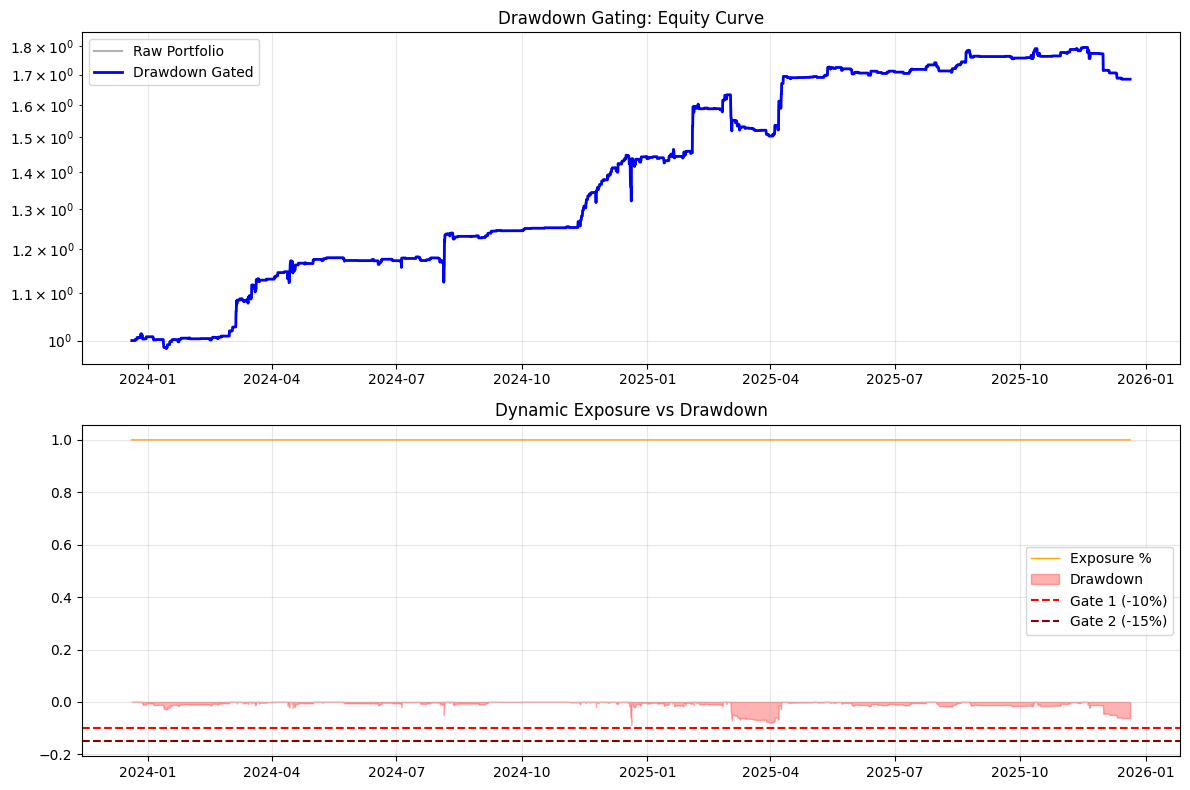

In [27]:
# --- 10. Advanced Risk Management: Drawdown Gating (No Vol Targeting) ---

print("\n--- 10. Advanced Risk Management: Drawdown Gating ---")

# 1. Setup Data
# We start with the raw portfolio returns from Step 9 (before compounding)
risk_df = portfolio_df[['Portfolio_Ret']].copy()

# Parameters
DD_GATE_1 = -0.10  # If DD < -10%, cut exposure to 50%
DD_GATE_2 = -0.15  # If DD < -15%, cut exposure to 25%
RESTORE_DD = -0.05 # If DD recovers above -5%, start restoring
RESTORE_RATE = 0.10 # Increase exposure by 10% per period when restoring

# 2. Drawdown Gating Logic (Iterative)
risk_df['Managed_Ret'] = 0.0
risk_df['Managed_Equity'] = 1.0
risk_df['Drawdown'] = 0.0
risk_df['Exposure'] = 1.0 # Start at 100% exposure

equity = 1.0
peak = 1.0
current_dd = 0.0
current_exposure = 1.0

print("Running Drawdown Gating Loop...")
raw_rets = risk_df['Portfolio_Ret'].values
n = len(risk_df)

managed_rets = np.zeros(n)
exposures = np.zeros(n)
drawdowns = np.zeros(n)
equities = np.zeros(n)

# Pre-fill first equity
equities[0] = 1.0
exposures[0] = 1.0

for i in range(1, n):
    # 1. Determine Exposure based on *yesterday's* Drawdown
    # Logic:
    # - If DD hits gate, cut exposure immediately.
    # - If DD is recovering (above RESTORE_DD), increase exposure gradually.
    # - Otherwise, maintain current exposure.
    
    target_exposure = current_exposure
    
    if current_dd < DD_GATE_2:
        target_exposure = 0.25 # Hard cut to 25%
    elif current_dd < DD_GATE_1:
        target_exposure = min(current_exposure, 0.50) # Hard cut to 50% (don't increase if already lower)
    elif current_dd > RESTORE_DD:
        # Recovery mode: Gradually restore to 100%
        target_exposure = min(current_exposure + RESTORE_RATE, 1.0)
    
    # Apply exposure for today
    current_exposure = target_exposure
    
    # 2. Calculate Return
    period_ret = current_exposure * raw_rets[i]
    
    # 3. Update Equity & Drawdown
    equity = equity * (1 + period_ret)
    if equity > peak:
        peak = equity
    
    current_dd = (equity / peak) - 1
    
    # Store
    managed_rets[i] = period_ret
    exposures[i] = current_exposure
    drawdowns[i] = current_dd
    equities[i] = equity

# Save back to DataFrame
risk_df['Managed_Ret'] = managed_rets
risk_df['Exposure'] = exposures
risk_df['Drawdown'] = drawdowns
risk_df['Managed_Equity'] = equities

# 3. Metrics Comparison
print("\n--- Risk Management Results (Drawdown Gating) ---")
raw_total = (1 + risk_df['Portfolio_Ret']).cumprod().iloc[-1] - 1
mgd_total = risk_df['Managed_Equity'].iloc[-1] - 1

raw_dd = (portfolio_df['Portfolio_Equity'] / portfolio_df['Portfolio_Equity'].cummax() - 1).min()
mgd_dd = risk_df['Drawdown'].min()

print(f"Original Return: {raw_total:.2%} | Max DD: {raw_dd:.2%}")
print(f"Managed Return:  {mgd_total:.2%} | Max DD: {mgd_dd:.2%}")
print(f"Ret/DD Ratio:    {mgd_total/abs(mgd_dd):.2f} (vs {raw_total/abs(raw_dd):.2f})")

# Plot
plt.figure(figsize=(12, 8))

# Subplot 1: Equity Curves
plt.subplot(2, 1, 1)
plt.plot(risk_df.index, (1 + risk_df['Portfolio_Ret']).cumprod(), label='Raw Portfolio', color='gray', alpha=0.6)
plt.plot(risk_df.index, risk_df['Managed_Equity'], label='Drawdown Gated', color='blue', linewidth=2)
plt.title('Drawdown Gating: Equity Curve')
plt.yscale('log')
plt.legend()
plt.grid(True, alpha=0.3)

# Subplot 2: Exposure & Drawdown
plt.subplot(2, 1, 2)
plt.plot(risk_df.index, risk_df['Exposure'], label='Exposure %', color='orange', linewidth=1)
plt.fill_between(risk_df.index, risk_df['Drawdown'], 0, color='red', alpha=0.3, label='Drawdown')
plt.axhline(DD_GATE_1, color='red', linestyle='--', label='Gate 1 (-10%)')
plt.axhline(DD_GATE_2, color='darkred', linestyle='--', label='Gate 2 (-15%)')
plt.title('Dynamic Exposure vs Drawdown')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


--- 9. Portfolio Construction & Stress Testing ---
Portfolio Period: 2023-12-16 08:00:00 to 2025-12-20 12:00:00

--- Equal-Weight Portfolio Results ---
Total Return: 253.09%
Max Drawdown: -47.46%
Sharpe Ratio: 5.33 (Return/DD)


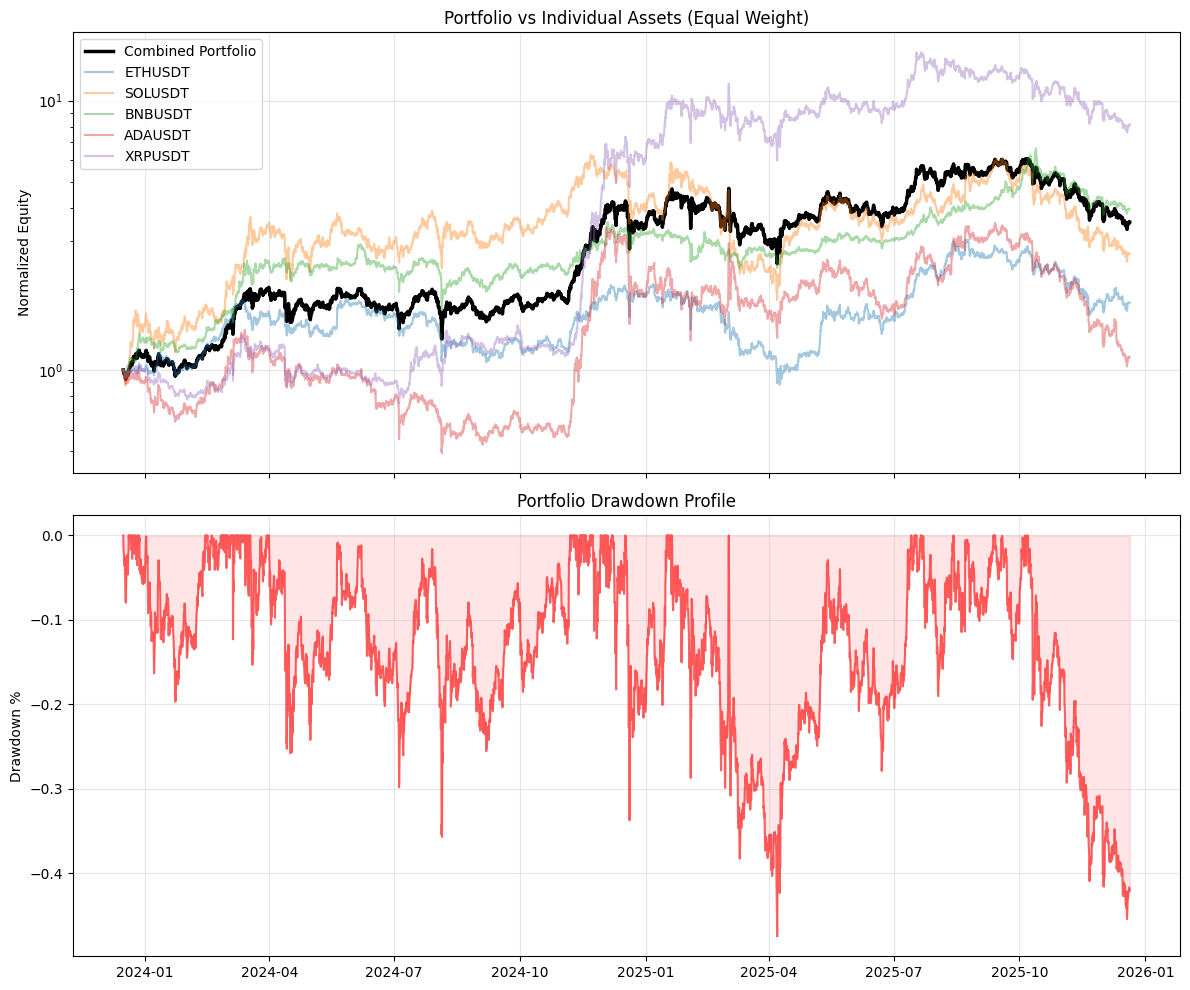


--- Stress Tests ---
Scenario A (No XRP): Return 138.55% | Max DD -55.88%
Scenario B (Cap SOL 10%): Return 263.41% | Max DD -45.80%

Asset Correlation Matrix:
         ETHUSDT  SOLUSDT  BNBUSDT  ADAUSDT  XRPUSDT
ETHUSDT     1.00     0.72     0.68     0.74     0.65
SOLUSDT     0.72     1.00     0.62     0.69     0.59
BNBUSDT     0.68     0.62     1.00     0.65     0.56
ADAUSDT     0.74     0.69     0.65     1.00     0.76
XRPUSDT     0.65     0.59     0.56     0.76     1.00

Average Correlation: 0.67
NOTE: Moderate correlation suggests meaningful diversification benefit.


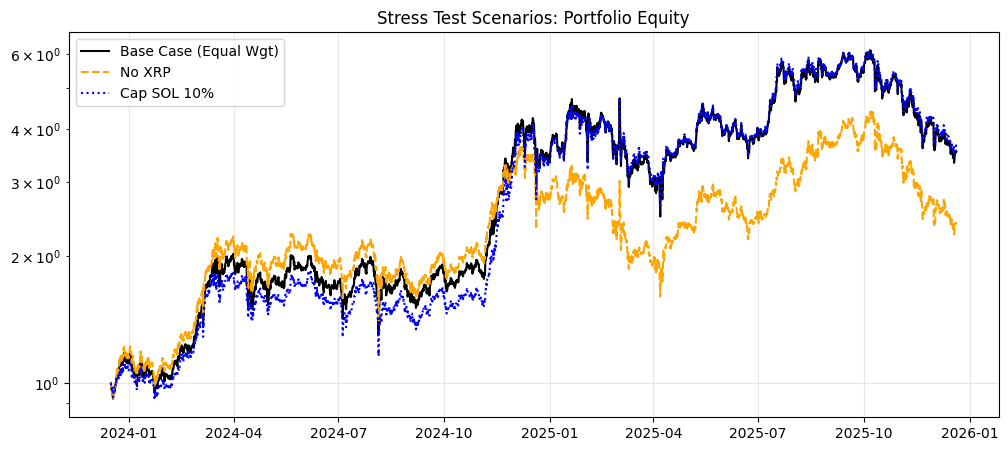

In [28]:
# --- 9. Portfolio Construction & Stress Testing ---

print("\n--- 9. Portfolio Construction & Stress Testing ---")

# 1. Build Combined Portfolio (Equal Weight)
# We need to align all equity curves to a common timeframe
# First, find the common date range
common_start = max([curve.index.min() for curve in equity_curves.values()])
common_end = min([curve.index.max() for curve in equity_curves.values()])

print(f"Portfolio Period: {common_start} to {common_end}")

# Re-index and normalize curves to the common period
aligned_curves = pd.DataFrame()
for symbol, curve in equity_curves.items():
    # Filter to common range
    mask = (curve.index >= common_start) & (curve.index <= common_end)
    aligned_curve = curve[mask]
    
    # Normalize to start at 1.0
    aligned_curve = aligned_curve / aligned_curve.iloc[0]
    aligned_curves[symbol] = aligned_curve

# Fill any missing timestamps (forward fill)
aligned_curves = aligned_curves.ffill().dropna()

# Calculate Portfolio Equity (Equal Weight: 20% each)
n_assets = len(aligned_curves.columns)
weights = np.array([1/n_assets] * n_assets)
portfolio_equity = aligned_curves.dot(weights)

# Calculate Portfolio Drawdown
port_peak = portfolio_equity.cummax()
port_dd = (portfolio_equity / port_peak) - 1
port_max_dd = port_dd.min()
port_total_ret = portfolio_equity.iloc[-1] - 1

print(f"\n--- Equal-Weight Portfolio Results ---")
print(f"Total Return: {port_total_ret:.2%}")
print(f"Max Drawdown: {port_max_dd:.2%}")
print(f"Sharpe Ratio: {(port_total_ret / abs(port_max_dd)):.2f} (Return/DD)")

# 2. Plot Portfolio Metrics
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Top: Equity Curves
ax1.plot(portfolio_equity.index, portfolio_equity, label='Combined Portfolio', color='black', linewidth=2.5)
for col in aligned_curves.columns:
    ax1.plot(aligned_curves.index, aligned_curves[col], label=col, alpha=0.4)

ax1.set_title('Portfolio vs Individual Assets (Equal Weight)')
ax1.set_ylabel('Normalized Equity')
ax1.legend(loc='upper left')
ax1.grid(True, alpha=0.3)
ax1.set_yscale('log')

# Bottom: Portfolio Drawdown
ax2.plot(port_dd.index, port_dd, color='red', alpha=0.6)
ax2.fill_between(port_dd.index, port_dd, 0, color='red', alpha=0.1)
ax2.set_title('Portfolio Drawdown Profile')
ax2.set_ylabel('Drawdown %')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 3. Stress Tests

print("\n--- Stress Tests ---")

# Test A: Remove XRP (Regulatory Risk)
stress_no_xrp = aligned_curves.drop(columns=['XRPUSDT'])
w_no_xrp = np.array([1/4] * 4)
port_no_xrp = stress_no_xrp.dot(w_no_xrp)
ret_no_xrp = port_no_xrp.iloc[-1] - 1
dd_no_xrp = (port_no_xrp / port_no_xrp.cummax() - 1).min()

print(f"Scenario A (No XRP): Return {ret_no_xrp:.2%} | Max DD {dd_no_xrp:.2%}")

# Test B: Cap SOL Size (Liquidity/Idiosyncratic Risk)
# Cap SOL at 10%, redistribute rest to others
# Weights: SOL=0.10, Others=0.225 each
w_cap_sol = {
    'SOLUSDT': 0.10,
    'ETHUSDT': 0.225,
    'BNBUSDT': 0.225,
    'ADAUSDT': 0.225,
    'XRPUSDT': 0.225
}
# Ensure order matches columns
w_vector_b = np.array([w_cap_sol[col] for col in aligned_curves.columns])
port_cap_sol = aligned_curves.dot(w_vector_b)
ret_cap_sol = port_cap_sol.iloc[-1] - 1
dd_cap_sol = (port_cap_sol / port_cap_sol.cummax() - 1).min()

print(f"Scenario B (Cap SOL 10%): Return {ret_cap_sol:.2%} | Max DD {dd_cap_sol:.2%}")

# Test C: Worst-Case Correlation (All Assets Drop Together)
# We simulate this by looking at the correlation matrix of returns
# If correlations are high (>0.8), diversification fails during crashes
returns_matrix = aligned_curves.pct_change().dropna()
corr_matrix = returns_matrix.corr()

print("\nAsset Correlation Matrix:")
print(corr_matrix.round(2))

avg_corr = corr_matrix.values[np.triu_indices_from(corr_matrix.values, 1)].mean()
print(f"\nAverage Correlation: {avg_corr:.2f}")
if avg_corr > 0.7:
    print("WARNING: High correlation detected. Diversification benefit may be limited during crashes.")
else:
    print("NOTE: Moderate correlation suggests meaningful diversification benefit.")

# Plot Stress Scenarios
plt.figure(figsize=(12, 5))
plt.plot(portfolio_equity.index, portfolio_equity, label='Base Case (Equal Wgt)', color='black')
plt.plot(port_no_xrp.index, port_no_xrp, label='No XRP', color='orange', linestyle='--')
plt.plot(port_cap_sol.index, port_cap_sol, label='Cap SOL 10%', color='blue', linestyle=':')
plt.title('Stress Test Scenarios: Portfolio Equity')
plt.yscale('log')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


--- 1. Per-Trade Expectancy ---
Mean Return per Trade:   0.7242%
Median Return per Trade: 0.6373%
Best Trade:              4.0352%
Worst Trade:             -1.6510%
Avg Win: 1.6406%
Avg Loss: -1.0068%
Win/Loss Ratio: 1.63

--- 2. Year-by-Year Breakdown ---
      Total Strategy Return  Num Trades  Avg Market Return
Year                                                      
2023               0.000000           0          -0.000104
2024               0.176383          15           0.000424
2025               0.011904          11           0.000016


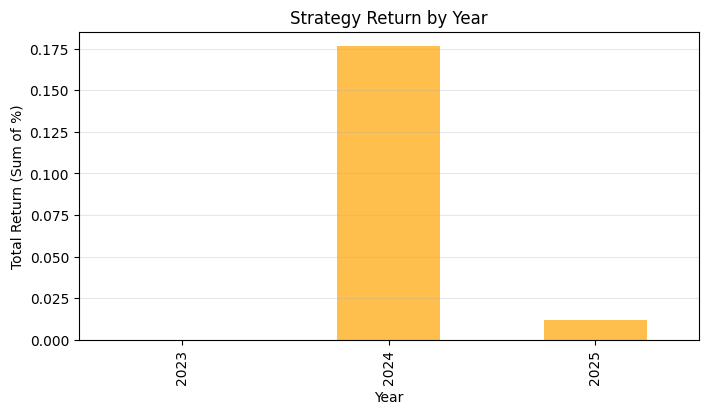


--- 3. EV vs Outcome Sanity Check ---
                 mean  count       std  mean_annualized
EV_Bucket                                              
< 0.10       0.000177   4437  0.010183         0.387602
0.10 - 0.15  0.004905     22  0.014712        10.742939
0.15 - 0.20  0.046025      1       NaN       100.795195
> 0.20       0.003387      3  0.047373         7.416654


C:\Users\dipta\AppData\Local\Temp\ipykernel_13256\1341959505.py:57: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ev_outcome = backtest_df.groupby('EV_Bucket')['Raw_Return'].agg(['mean', 'count', 'std'])


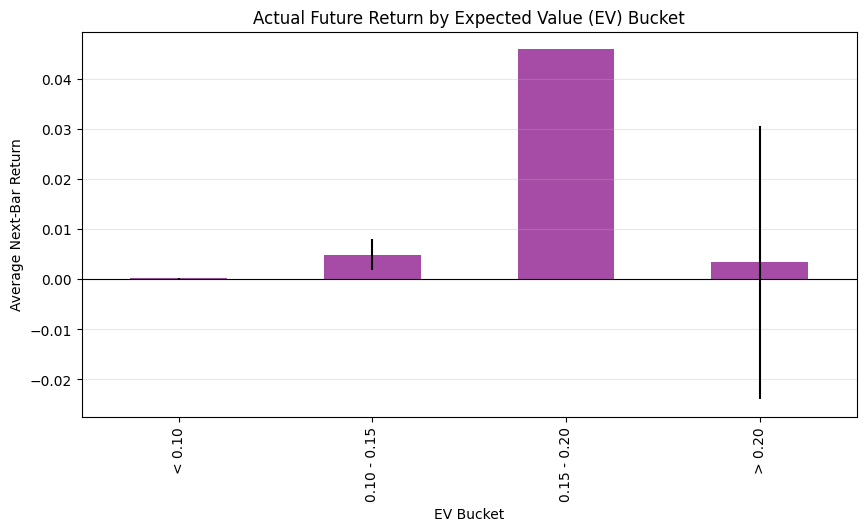

In [29]:
# --- DIAGNOSTICS ---

print("\n--- 1. Per-Trade Expectancy ---")
trades = backtest_df[backtest_df['Signal'] == 1].copy()

if len(trades) > 0:
    mean_ret = trades['Strategy_Return'].mean()
    median_ret = trades['Strategy_Return'].median()
    best_trade = trades['Strategy_Return'].max()
    worst_trade = trades['Strategy_Return'].min()
    
    print(f"Mean Return per Trade:   {mean_ret:.4%}")
    print(f"Median Return per Trade: {median_ret:.4%}")
    print(f"Best Trade:              {best_trade:.4%}")
    print(f"Worst Trade:             {worst_trade:.4%}")
    
    # Win/Loss Ratio
    winning_trades = trades[trades['Strategy_Return'] > 0]
    losing_trades = trades[trades['Strategy_Return'] <= 0]
    avg_win = winning_trades['Strategy_Return'].mean() if len(winning_trades) > 0 else 0
    avg_loss = losing_trades['Strategy_Return'].mean() if len(losing_trades) > 0 else 0
    
    print(f"Avg Win: {avg_win:.4%}")
    print(f"Avg Loss: {avg_loss:.4%}")
    if avg_loss != 0:
        print(f"Win/Loss Ratio: {abs(avg_win/avg_loss):.2f}")
else:
    print("No trades taken.")

print("\n--- 2. Year-by-Year Breakdown ---")
backtest_df['Year'] = backtest_df['Open time'].dt.year
yearly_stats = backtest_df.groupby('Year').agg({
    'Strategy_Return': 'sum',
    'Signal': 'sum',
    'Raw_Return': 'mean' # Market average return
})
yearly_stats.columns = ['Total Strategy Return', 'Num Trades', 'Avg Market Return']
print(yearly_stats)

# Plot Yearly Performance
plt.figure(figsize=(8, 4))
yearly_stats['Total Strategy Return'].plot(kind='bar', color='orange', alpha=0.7)
plt.title('Strategy Return by Year')
plt.ylabel('Total Return (Sum of %)')
plt.grid(axis='y', alpha=0.3)
plt.show()

print("\n--- 3. EV vs Outcome Sanity Check ---")
# We bucket all data points by EV to see if higher EV -> Higher Future Return
# Using the bins suggested: <0.10, 0.10-0.15, 0.15-0.20, >0.20
ev_bins = [-np.inf, 0.10, 0.15, 0.20, np.inf]
ev_labels = ['< 0.10', '0.10 - 0.15', '0.15 - 0.20', '> 0.20']

backtest_df['EV_Bucket'] = pd.cut(backtest_df['EV'], bins=ev_bins, labels=ev_labels)

# Calculate mean future return for each bucket
ev_outcome = backtest_df.groupby('EV_Bucket')['Raw_Return'].agg(['mean', 'count', 'std'])
ev_outcome['mean_annualized'] = ev_outcome['mean'] * (365 * 6) # Approx annualized

print(ev_outcome)

plt.figure(figsize=(10, 5))
ev_outcome['mean'].plot(kind='bar', color='purple', alpha=0.7, yerr=ev_outcome['std']/np.sqrt(ev_outcome['count']))
plt.title('Actual Future Return by Expected Value (EV) Bucket')
plt.xlabel('EV Bucket')
plt.ylabel('Average Next-Bar Return')
plt.axhline(0, color='black', linewidth=0.8)
plt.grid(axis='y', alpha=0.3)
plt.show()

In [ ]:
!pip install torch

In [ ]:
!pip install xgboost scikit-learn

In [ ]:
df = df_wrapper

In [ ]:
import matplotlib.pyplot as plt

# Plot Closing Price
plt.figure(figsize=(12, 6))
plt.plot(df["Open time"], df["Volume"], label="BTCUSDT Close Price")
plt.title("BTCUSDT Daily Closing Price")
plt.xlabel("Date")
plt.ylabel("Price (USDT)")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Plot Closing Price
plt.figure(figsize=(12, 6))
plt.plot(df["Open time"], df["Close"], label="BTCUSDT Close Price")
plt.title("BTCUSDT Daily Closing Price")
plt.xlabel("Date")
plt.ylabel("Price (USDT)")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
!pip install python-binance

## Using `python-binance` (Unofficial Wrapper)

The `python-binance` library is a popular unofficial wrapper that simplifies interacting with the Binance API. It handles authentication, request signing, and provides convenient helper methods.

To use it, you first need to install it:

In [30]:
# --- Save Model for Production ---
import joblib
import os

# Define path
model_path = 'rf_model.pkl'

# Save the Random Forest model
joblib.dump(rf_model, model_path)
print(f"Model saved to {os.path.abspath(model_path)}")

# Print Volatility Quantiles for Config
print("\n--- Configuration Values for Production ---")
print(f"VOL_20_Q33 = {vol_20_q33}")
print(f"VOL_20_Q67 = {vol_20_q67}")
print("Please update these values in crypto/src/feature_engineering.py")

Model saved to c:\Users\dipta\OneDrive\Documents\crypto_live_trade\crypto\src\rf_model.pkl

--- Configuration Values for Production ---
VOL_20_Q33 = 0.01129099637619045
VOL_20_Q67 = 0.017789873568437326
Please update these values in crypto/src/feature_engineering.py
